In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import HTML
from base64 import b64encode
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
def show_gif(gif_path):
  with open(gif_path, "rb") as f:
      video_data = f.read()
  encoded_data = b64encode(video_data).decode()
  display(HTML(f"""
  <img src="data:image/gif;base64,{encoded_data}" alt="Gif">
  """))

#**Part I**

#**Reinforcement Learning and Deep Q Learning**

##**Part A**

##**Policy Iteration**

In policy Iteration, we start with the random policy and find the value function of that policy;
if the value function is not optimal, we find the new, improved policy.

Let us consider a pirate ship, which is currently anchored at an island and, has to reach its homeland safely. There are two routes it could choose from.

If it takes the route to the north, then it can reach an island which is full of gold, which it can collect, and then move south to reach the homeland. However, there is an area with a very high gravity (like the Bermuda triangle) to the north of the gold island. If the ship reaches there by mistake, then it will be sucked into it and the ship is lost forever.

If it takes the route to the south, then it can reach an island, which is full of silver, which it can collect, and then move north to reach the homeland. There is a prison island to the south of the silver island. If the ship lands there by mistake, then the ship will be captured and the crew will be imprisoned.

Every time, the captain makes a move towards north, he moves north with a probability of 0.8, however, he might miss the mark and reach south with a probability of 0.2. Similarly, if he moves south, there is a 0.8 probability of going south and 0.2 probability of going north.

###**Rewards (Positive and Negative)**

* Reaching homeland will allow the pirate ship to collect +1 point.
* Landing on the gold island will allow the pirate ship to collect +2 points.
* Landing on the silver island will allow the pirate ship to collect +1 point.
* If the ship gets sucked into Bermuda triangle, then the ship gets -2 points.
* If the ship is captured in the prison island, then the ship get -0.5 points.

Our goal is to find the optimal policy for the ship to reach its homeland safely with maximum rewards.

###**State transition diagram**

There are six states including start and destination states and four intermediary islands where they can hop on. Let us label the states from S1 to S6 as follows:

* S1: Start state
* S2: State of landing in gold Island
* S3: State of landing in silver Island
* S4: State of landing in Bermuda Triangle Island
* S5: State of landing in destination Island
* S6: State of landing in prison Island

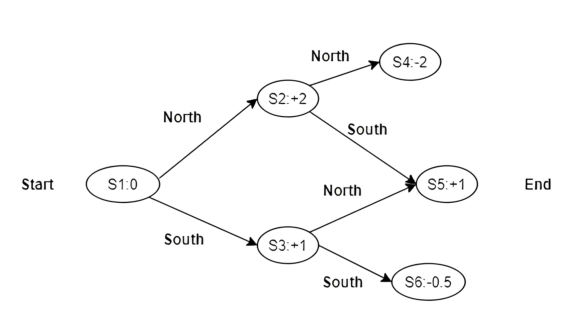

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/1.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

###**Transition probability matrix**

We need to compute transition probabilities for each state/action pair. Based on the probabilities provided above and the state transition diagram, we can draw this up as below.

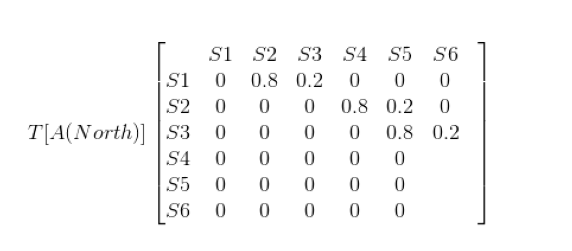

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/2.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

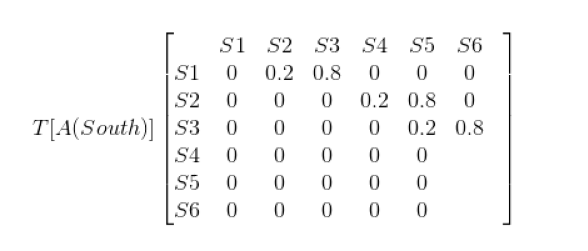

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/3.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

###**Step 1**
Initialize actions randomly at every state of the system.

We randomly initialize the policy (state to action mapping) as moving north for all states.

P = {N, N, N, N, N, N}

If we observe the state transition diagram, the states S4, S5, S6 do not have any actions supported in these states, as these are end states. So we curtail our policy to apply to only the first three states where we can take an action.

P = {N, N, N}

###**Step 2**


Step 2 is based on Bellman’s equation which is provided below:

$$V(s) = r(s) + \gamma \cdot \max_{s', r} \left( \sum_{s', r} p(s', r \mid s, \pi(s)) \cdot V(s') \right)$$

* V(s): The value of state (s)
* r(s): The immediate reward for being in state (s)
* $\gamma$: The discount factor, which determines the importance of future rewards
* $\max_{a}$: The maximum over all actions (a)
* $\sum_{s’, r}$: The sum over all possible next states (s’) and rewards (r)
* $p(s’, r | s, a)$: The probability of transitioning to state (s’) and receiving reward (r) when taking action (a) in state (s)
* $V(s’)$: The value of the next state (s’)

Get action for every state in the policy and evaluate the value function using the above equation.

###**Step 3**

For every state, get the best action from value function using:

$$\pi(s) = \arg\max_a \sum_{s'} p(s'|s,a) \cdot v(s')$$

If the best action is better than the present policy action, then replace the current action by the best action.

###**Policy Iterations:**

Iterate steps 2 and 3, until convergence. If the policy did not change throughout an iteration, then we can consider that the algorithm has converged.

####**First iteration:**

Let us assume the initial value V(s) for all states as 0. Thus, the Bellman equation would reduce to V(s) = R(s), where R(s) is the reward for entering a state.

Policy Evaluation for first iteration:

V[S1] = 0; V[S4] = -2

V[S2] = 2; V[S5] = 1

V[S3] = 1; V[S6] = -0.5

Policy Improvement for first iteration:

Let us apply the equation provided above for Policy Improvement.

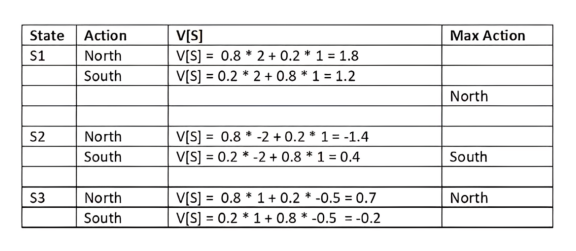

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/4.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

The policy obtained based on the above table is as follows:

P = {N,S,N}

####**Second iteration**

Policy Evaluation for the second iteration:

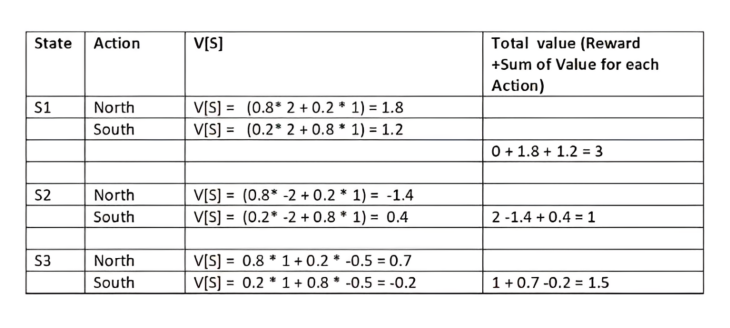

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/5.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

The values for each state could be summarized as below:

V[S1] = 3; V[S4] = -2

V[S2] = 1; V[S5] = 1

V[S3] = 1.5; V[S6] = -0.5

Policy Improvement for second iteration:

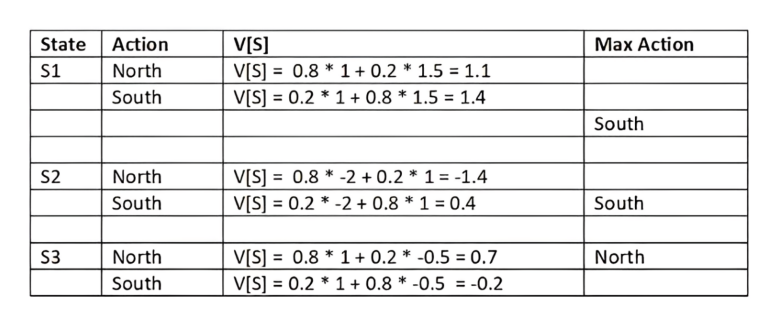

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/6.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

The policy obtained based on above table is as follows:

P = {S, S, N}

####**Third iteration**

Policy Evaluation for third iteration:

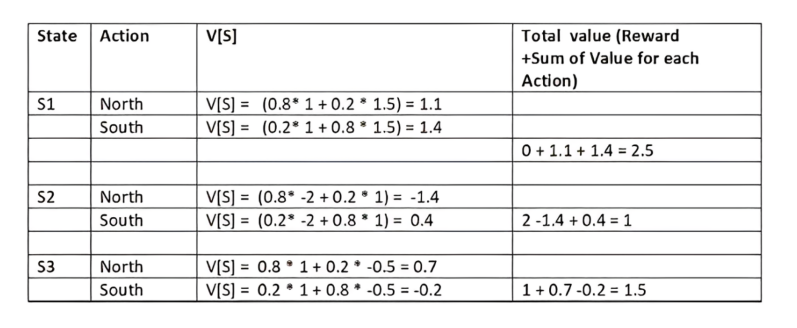

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/7.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Values for each state could be summarized as below:

V[S1] = 2.5; V[S4] = -2

V[S2] = 1; V[S5] = 1

V[S3] = 1.5; V[S6] = -0.5

Policy Improvement for third iteration:

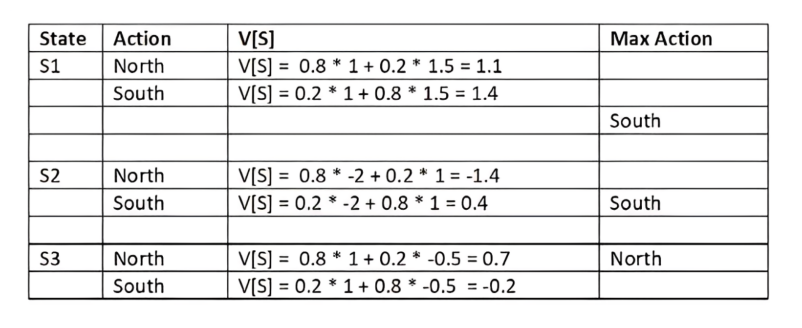

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/8.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

The policy obtained based on above table is as follows:

P = {S, S, N}

If we compare this policy, to the policy we obtained in second iteration, we can observe that policies did not change, which implies algorithm has converged and this is the optimal policy.

##**Part B**

##**Create a deep Q-learning agent using TensorFlow**

###**1. Import dependencies**

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from keras.optimizers import Adam
from IPython.display import HTML
import os
import numpy as np
import matplotlib.pyplot as plt

###**2. Hyperparameters and initialise environment**

We import OpenAI Gym and we use to make method to seelect the environment of ourchoice

In [ ]:
env = gym.make('CartPole-v0')

We have 4 states in this problem:
* cart position
* cart velocity
* pole angle
* pole angular velocity

In [ ]:
state_size = env.observation_space.shape[0]
state_size

4

The agent can take two actions-right or left.

In [ ]:
action_size = env.action_space.n
action_size


2

In [ ]:
batch_size = 32

Number of games that the agent is going to play

In [ ]:
n_episodes = 200

###**3. Storing the model output**

In [ ]:
output_dir = '/content/drive/MyDrive/AI/Project/Project_3/Cartpole'

In [ ]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

###**4. Define DQNAgent**

We are using a python class to define or Deep Q-Learning Network agent.

So, when we initialize our agent, we pass in the **state size** as well as the **action size**. And then, we set those as attributes for the class.

We have **memory**, which we will use to do something called "memory replay" later. So, what we are going to do is go to the store up to 2000 memories at any given time point. A deque is just like a list, except that we can set a maximum size to the list. We append memories to our list. First, we have one, then two, then three. Once we get up to 1998-1999, we add our 2000th memory. That is the maximum amount that we can put on this list. So, as we add more items to the list after we already have 2000, we retain the latest memories, but we ditch the oldest memories.

The **gamma** term that we talked about with respect to discounted future reward. The gamma term is going to discount our future reward.

Another hyperparameter associated with Deep Q-Learning is the **epsilon** hyperparameter. So this is the exploration rate. Our exploration rate is a factor between zero and one that determines on any given move whether we take an exploited action, where we make our best guess as to what the correct action should be and take that action.Alternatively, we take an exploratory action, and when we take an exploratory action, we just randomly take action.

In the beginning, we want to be mostly taking exploratory random actions. However, the longer we train, the more we should be able to exploit what we learned and take these exploitative actions. So, the Cartpole game also involved randomly moving left or right. We set a floor on how **low our exploration rate can go**. A common minimum floor is 1%. Once we get there, we will take random actions on 1% of our actions.

The rate at which we decay from our initial 100% exploration rate down to our 1% exploration rate is determined by **epsilon decay**.

###**5. Build model**

We are using the Keras sequential API. The first hidden layer, consists of 32 ReLU neurons, and we also must specify our input shape. Our input shape is the four states. So we will be using this neural net to map states to actions.

It has two hidden layers, and the first hidden layer has 32 ReLU neurons. The second hidden layer has 32 ReLU neurons. And then, We have an output layer, which has a linear activation, and two neurons. So, We could consider this task to be a binary classification task, where we just have two possible actions, left and right, which are encoded by zero and one, respectively. We are using the linear activation function here because, again, with a Cartpole game, it is just a discrete action left to right.

 After designing our neural network architecture, we then compile the model. We are using mean squared error loss because that is the kind of loss we should use when using a linear activation output.

###**6. Remember action**

We have our deque of up to a 2000 memories stored in a list-like format. So, at any given time point, we have the current state, we have the action that our agent took given that state, and we have the reward that we received from the environment given the agent's action in that state. Furthermore, we also have the next state, a time step T plus one, that was returned to the agent based on the action it took at the state at time step T.So, done simply indicates whether the game has ended or not.

So, these five elements give us our set of items that we can record at any given time point. So we append these memories after every single action that we take, after every single round of gameplay. We use the remember method to remember one more experience.

###**7. Train model**

We start by sampling a minibatch from memory. We randomly sample from our memory deque a batch of the size of our mini-batch size that we decided on for stochastic gradient descent.

 Once we have that minibatch, we loop over all of the elements, all of the memories within that minibatch, until we have those same five elements that we had stored here within any given memory.

 if the game ended, so if this memory was the final time step in a given a round of gameplay, this is a step in which the agent got to the final round of gameplay. So, it managed to stay alive for 200-time steps, or this is because the game ended early due to the pole moving away from vertical. In that case, if the game is over, then our target reward is equal to whatever the reward that we attained. So, we do not need to guess what our discounted future reward might be. We know precisely what are target reward is.

If the game is not done, we will calculate the future target reward based on the next state. We will take the reward that we know we have, and then we calculate based on the next state returned.

target = reward + discount rate gamma * maximum Q value based on future action a'

So based on the state at time step T plus one, we use our model to predict the future reward, and we discount that future reward by our discount rate gamma.

Then we use fit method and our Neural network to see which action is optimal.

Finally, we adjust the value of epsilon

###**8. Decide action**

This function, act, decides the action the agent should take given its current state.

 With a probability of epsilon, the agent chooses a random action. This is done to explore the environment and learn about the rewards associated with different actions in different states.

 With a probability of 1 - epsilon, the agent chooses the action that it predicts will give the maximum reward based on its current knowledge. This is done using the trained model to predict the reward for each possible action, and then choosing the action with the highest predicted reward.

###**9. Save model**

A simple utility method is here for saving model weights at regular intervals. And then, we can choose to load those model weights back in later on

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(32, activation='relu', input_dim=self.state_size))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',optimizer=Nadam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action,reward, next_state, done))

    def train(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

###**10. Initialise the agent**

In [ ]:
agent = DQNAgent(state_size, action_size)

###**11. Interact with environment**

Now we create an instance of our agent. And then we train it over episodes. So, it will train for 200 episodes starting in episode zero.

At the beginning of any given episode, we reset our environment to some random starting point. So the environment gives us four random state values as a starting point.

We reshape the values so that they are in the right orientation for passing into our neural network.

Before playing the game, we set our done flag equal to false. And we start at time equals zero. Then we have a while loop that loops until the game ends(This while loop ends if we get to 200 timesteps or the pole falls, or cart disappears from the screen.). If the game ends early, we will have a negative reward. Thus, that reward should be avoided.

First, we take an action regarding to current state, use act method. we actually choose to move cart left or right.

Then we get feedback from environment after new action too see what is the next state, reward, and checj if game has ended.

We set current reward to -10 if game has ended early and if it is not ended, we set it to obtained reward from environment.

We reshape our next state so that it is in the right orientation for passing into our neural network.

Then we use remember method to remember the previous timestep's state, actions, reward, etc.

And finally we set our current state to the next state.

If the game has ended, we print the episode's score and agent's epsilon.

We set a maximum length for our dequeu, so if its length get loger than batch size, train the agent by replaying the experiences of the episode

We then save the model weights of our agent after 50 episodes so that we can go back and load those in if we want to for some production algorithm.

In [ ]:
epsilon_list = []
score_list = []
for e in range(n_episodes):

    state = env.reset()
    state = np.reshape(state, [1, state_size])

    done = False
    time = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}" .format(e, n_episodes-1, time, agent.epsilon))
            epsilon_list.append(agent.epsilon)
            score_list.append(time)
        time += 1

    if len(agent.memory) > batch_size:
        agent.train(batch_size)

    if e % 50 == 0:
        agent.save(output_dir + "weights_"
                   + '{:04d}'.format(e) + ".hdf5")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 43ms/step
episode: 142/199, score: 24, e: 0.49
1/1 [==============================] - 0s 24ms/step
episode: 143/199, score: 55, e: 0.49
1/1 [==============================] - 0s 24ms/step
episode: 144/199, score: 57, e: 0.49
1/1 [==============================] - 0s 25ms/step
episode: 145/199, score: 72, e: 0.49
1/1 [==============================] - 0s 24ms/step
episode: 146/199, score: 32, e: 0.48
1/1 [==============================] - 0s 23ms/step
episode: 147/199, score: 44, e: 0.48
1/1 [==============================] - 0s 25ms/step
episode: 148/199, score: 22, e: 0.48
1/1 [==============================] - 0s 26ms/step
episode: 149/199, score: 16, e: 0.48
1/1 [==============================] - 0s 27ms/step
episode: 150/199, score: 32, e: 0.47
1/1 [==============================] - 0s 24ms/step
episode: 151/199, score: 27, e: 0.47
1/1 [==============================] - 0s 20ms/step
episode

###**12. Plot epsilon over episodes**

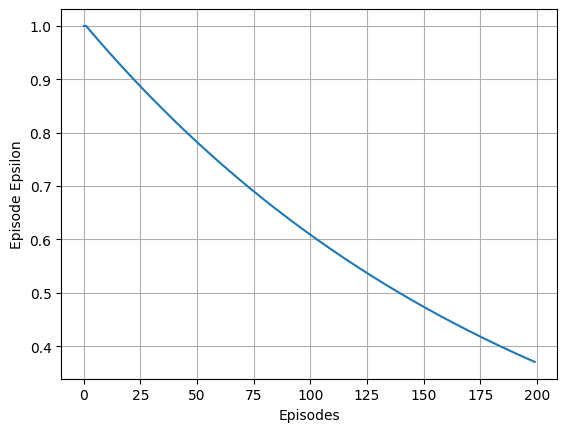

In [ ]:
plt.plot([i for i in range(len(epsilon_list))],epsilon_list)
plt.xlabel('Episodes')
plt.ylabel('Episode Epsilon')
plt.grid(True)

###**13. Plot score over episodes**

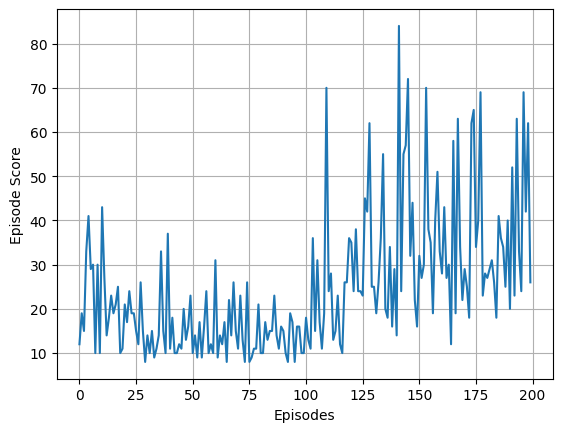

In [ ]:
plt.plot([i for i in range(len(score_list))],score_list)
plt.xlabel('Episodes')
plt.ylabel('Episode Score')
plt.grid(True)

###**14. Calculate average score**

In [ ]:
av_score = np.mean(score_list)
print('Average Score: ', av_score)

Average Score:  24.8


##**Update HyperParameters use RandomSearch Optimization**

###**1. Install keras tuner**

To integrate RandomSearch Optimization, we'll use the scikit-optimize library (skopt).

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


###**2. Import dependencies**

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from keras.optimizers import Adam
from IPython.display import HTML
import os
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner

###**3. Storing the model output**

In [ ]:
output_dir = '/content/drive/MyDrive/AI/Project/Project_3/Cartpole2'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

###**4. Define DQNA agent**

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size, gamma, epsilon_decay, learning_rate):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = 1.0
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = 0.01
        self.learning_rate = learning_rate
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(32, activation='relu', input_dim=self.state_size))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',optimizer=Nadam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action,reward, next_state, done))

    def train(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

###**5. Define tuner class**

In [ ]:
batch_size = 32
n_episodes = 50

env = gym.make('CartPole-v0')

state_size = env.observation_space.shape[0]
action_size = env.action_space.n

class MyTuner(keras_tuner.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters

        gamma = hp.Float("gamma", min_value=0.9, max_value=0.999)
        epsilon_decay = hp.Float("epsilon_decay", min_value=0.9, max_value=0.999)
        learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-2)

        score_list = []
        agent = DQNAgent(state_size, action_size, gamma, epsilon_decay, learning_rate)

        for e in range(n_episodes):

          state = env.reset()
          state = np.reshape(state, [1, state_size])

          done = False
          time = 0
          while not done:
              action = agent.act(state)
              next_state, reward, done, _ = env.step(action)
              reward = reward if not done else -10
              next_state = np.reshape(next_state, [1, state_size])
              agent.remember(state, action, reward, next_state, done)
              state = next_state
              if done:
                  print("episode: {}/{}, score: {}, e: {:.2}" .format(e, n_episodes-1, time, agent.epsilon))
                  score_list.append(time)
              time += 1

          if len(agent.memory) > batch_size:
              agent.train(batch_size)

        return np.mean(score_list)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


###**6. Initialize tuner**

In [ ]:
tuner = MyTuner(
    max_trials=10,
    overwrite=True,
    objective=keras_tuner.Objective('score', direction="max")
)

###**7. Find Best Hyperparameters**

In [ ]:
tuner.search()
tuner.results_summary()

Trial 10 Complete [00h 06m 32s]
score: 12.68

Best score So Far: 36.52
Total elapsed time: 01h 08m 41s
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="score", direction="max")

Trial 04 summary
Hyperparameters:
gamma: 0.9676948757381407
epsilon_decay: 0.9170195127839894
leearning_rate: 0.00324480604520504
Score: 36.52

Trial 03 summary
Hyperparameters:
gamma: 0.9386785193833638
epsilon_decay: 0.980885894644376
leearning_rate: 0.0058592258024138455
Score: 28.36

Trial 05 summary
Hyperparameters:
gamma: 0.9189074225705173
epsilon_decay: 0.9188373951843675
leearning_rate: 0.0016608732435013792
Score: 25.26

Trial 02 summary
Hyperparameters:
gamma: 0.9892487462063341
epsilon_decay: 0.9276401655541973
leearning_rate: 0.004802562866609682
Score: 23.72

Trial 08 summary
Hyperparameters:
gamma: 0.9277396731766232
epsilon_decay: 0.9934154264509197
leearning_rate: 0.003980802356479754
Score: 23.18

Trial 07 summary
Hyperparameters:
gamma: 0.9394366926246752
e

###**8. Train the Final Model with Best Hyperparameters**

In [ ]:
best_gamma, best_epsilon_decay, best_learning_rate = 0.9676948757381407, 0.9170195127839894, 0.00324480604520504
best_batch_size=32

env = gym.make('CartPole-v0')

state_size = 4
action_size = 2

final_agent = DQNAgent(state_size, action_size, best_gamma, best_epsilon_decay, best_learning_rate)

epsilon_list = []
score_list = []
for e in range(200):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    done = False
    time = 0
    while not done:
        action = final_agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        final_agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}" .format(e, 199, time, final_agent.epsilon))
            epsilon_list.append(final_agent.epsilon)
            score_list.append(time)
        time += 1

    if len(final_agent.memory) > int(best_batch_size):
        final_agent.train(int(best_batch_size))

    if e % 50 == 0:
        final_agent.save(output_dir + f"weights_{e:04d}.hdf5")

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated,

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 32ms/step
episode: 152/199, score: 199, e: 0.0093
1/1 [==============================] - 0s 39ms/step
episode: 153/199, score: 27, e: 0.0093
1/1 [==============================] - 0s 29ms/step
episode: 154/199, score: 128, e: 0.0093
1/1 [==============================] - 0s 26ms/step
episode: 155/199, score: 12, e: 0.0093
1/1 [==============================] - 0s 33ms/step
episode: 156/199, score: 14, e: 0.0093
1/1 [==============================] - 0s 24ms/step
episode: 157/199, score: 32, e: 0.0093
1/1 [==============================] - 0s 44ms/step
episode: 158/199, score: 95, e: 0.0093
1/1 [==============================] - 0s 34ms/step
episode: 159/199, score: 36, e: 0.0093
1/1 [==============================] - 0s 83ms/step
episode: 160/199, score: 87, e: 0.0093
1/1 [==============================] - 0s 57ms/step
episode: 161/199, score: 199, e: 0.0093
1/1 [==============================]

###**9. Save final Model**

In [ ]:
final_agent.save(output_dir + "final_weights.hdf5")

###**10. Plot epsilon over episodes**

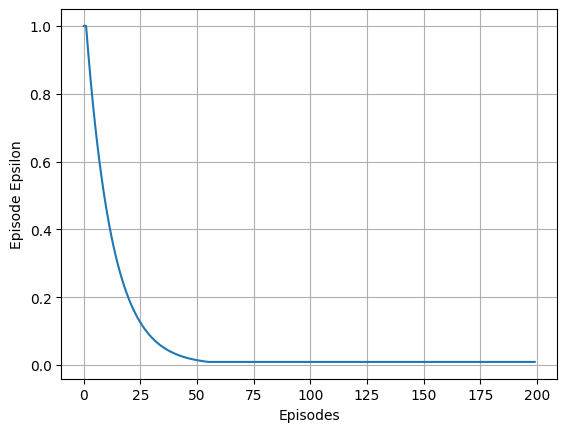

In [ ]:
plt.plot([i for i in range(len(epsilon_list))],epsilon_list)
plt.xlabel('Episodes')
plt.ylabel('Episode Epsilon')
plt.grid(True)

###**11. Plot score over episodes**

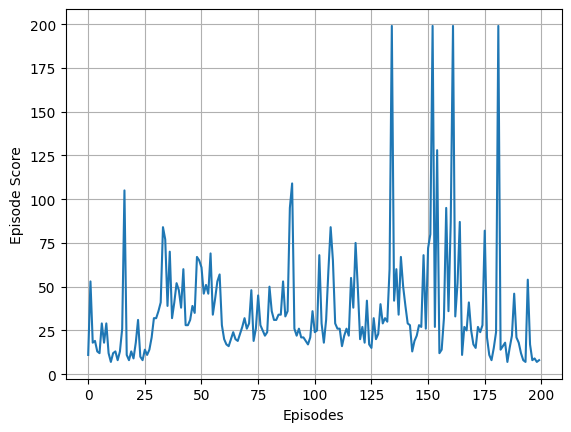

In [ ]:
plt.plot([i for i in range(len(score_list))],score_list)
plt.xlabel('Episodes')
plt.ylabel('Episode Score')
plt.grid(True)

###**12. Calculate average score**

In [ ]:
av_score = np.mean(score_list)
print('Average Score: ', av_score)

Average Score:  36.465


##**Part C**

##**FrozenLake game**

###**Game description**

In this example, reinforcement learning method (Deep Q Learning) makes its effort to learn 4x4  Frozen Lake.
The 4x4 game environment is like the following:

By default, the environment is always in the same configuration. In the environment’s code, each tile is represented by a letter as follows:

In [ ]:
S F F F       (S: starting point, safe)
F H F H       (F: frozen surface, safe)
F F F H       (H: hole, stuck forever)
H F F G       (G: goal, safe)

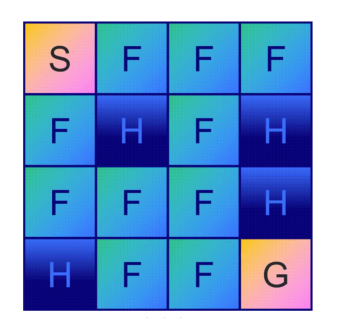

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/9.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

The agent should start from start position (state: 0), and reach the goal (state: 15) by walking in the frozen areas. If the agent reach the goal, it gets a reward .

* Tiles can be a safe frozen lake ✅, or a hole ❌ that gets you stuck forever.

* The AI, or agent, has 4 possible actions: go ◀️LEFT, 🔽DOWN, ▶️RIGHT, or 🔼UP.

* The agent must learn to avoid holes in order to reach the goal in a minimal number of actions.

There are two versions of the game: **slippery and non_slippery**

The difference between the slippery and non-slippery versions of the game lies in the movement of the player:

Slippery Version: In the slippery version, the player may not always move in the intended direction due to the slippery nature of the frozen lake12. If is_slippery is set to True, the player will move in the intended direction with a probability of 1/3, and will move in either perpendicular direction with an equal probability of 1/3 in both directions2. For example, if the action is left and is_slippery is True, then:

P(move left) = 1/3

P(move up) = 1/3

P(move down) = 1/3

Non-Slippery Version: In the non-slippery version, the player always moves in the intended direction. If is_slippery is set to False, the player will always move in the direction of the action taken2.

###**Q table**

In Frozen Lake, there are 16 tiles, which means our agent can be found in 16 different positions, called states. For each state, there are 4 possible actions: go ◀️LEFT, 🔽DOWN, ▶️RIGHT, and 🔼UP. Learning how to play Frozen Lake is like learning which action you should choose in every state. To know which action is the best in a given state, we would like to assign a quality value to our actions. We have 16 states and 4 actions, so want to calculate 16 x 4 = 64 values.

A nice way of representing it is using a table, known as a Q-table, where rows list every state s and columns list every action a. In this Q-table, each cell contains a value Q(s, a), which is the value (quality) of the action a in the state s (1 if it’s the best action possible, 0 if it’s really bad). When our agent is in a particular state s, it just has to check this table to see which action has the highest value.

In [ ]:
S     ◀️LEFT    🔽DOWN    ▶️RIGHT   🔼UP
0     Q(0,◀️)   Q(0,🔽)   Q(0,▶️)   Q(0,🔼)
1     Q(1,◀️)   Q(1,🔽)   Q(1,▶️)   Q(1,🔼)
2     Q(2,◀️)   Q(2,🔽)   Q(2,▶️)   Q(2,🔼)
...     ...       ...        ...       ...
14    Q(14,◀️)  Q(14,🔽)  Q(14,▶️)  Q(14,🔼)
G     Q(15,◀️)  Q(15,🔽)  Q(15,▶️)  Q(15,🔼)

###**Code Implemenation**

####**1. Import Necessary libraries**

In [ ]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

####**2. Initialize the environment**

In [ ]:
environment = gym.make("FrozenLake-v1", is_slippery=False)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


####**3. Create Q Table**

Let’s create our Q-table and fill it with zeros since we still have no idea of the value of each action in each state.

In [ ]:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((16, 4))

nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

print('Q-table before training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


####**4. Q  Learrning**

We need to update the value of our state-action pairs (each cell in the Q-table) considering:
* 1. the reward for reaching the next state(formally noted rₜ)
* 2. the highest possible value in the next state(maxₐQ(sₜ₊₁, a))

Therefore, the update formula must look like:

$$Q_{\text{{new}}}(s_t, a_t) = Q(s_t, a_t) + \alpha \left[ r_{t} + \gamma \max_{a}Q(s_{t+1},a) - Q(s_t,a_t) \right]
$$

α is the 💡learning rate (between 0 and 1), which is how much we should change the original Q(sₜ, aₜ) value.

γ is the 📉discount factor (between 0 and 1), which determines how much the agent cares about future rewards compared to immediate ones


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Success rate = 95.89999999999999%

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]



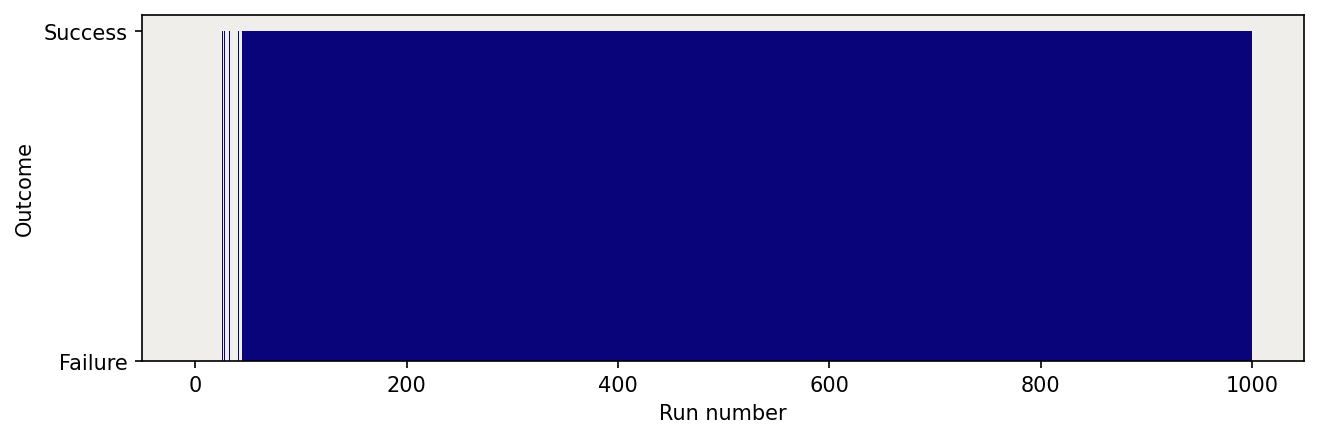

In [ ]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams.update({'font.size': 10})

qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

# Training

nb_success = 0
for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")
print()

print('Q-table after training:')
print(qtable)
print()

# Plot outcomes
plt.figure(figsize=(10, 3))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

 we can see that the agent had a hard time finding the goal at the beginning of the training. But once it found it several times in a row, it began to consistently win.

###**5. Epsilon Greedy algorithm**

Until now, the agent always chooses the action with the highest value. So whenever a state-action pair starts having a non-zero value, the agent will always choose it.  The other actions will never be taken, which means we’ll never update their value… But what if one of these actions was better than the one the agent always takes?

In other words, we want to allow our agent to either:

* Take the action with the highest value (exploitation);
* Choose a random action to try to find even better ones (exploration).

A tradeoff between these two behaviors is important: if the agent only focuses on exploitation, it cannot try new solutions and thus doesn’t learn anymore. On the other hand, if the agent only takes random actions, the training is pointless since it doesn’t use the Q-table. So we want to change this parameter over time: at the beginning of the training, we want to explore the environment as much as possible. But exploration becomes less and less interesting, as the agent already knows every possible state-action pair. This parameter represents the amount of randomness in the action selection.

This technique is commonly called the **epsilon-greedy algorithm**, where epsilon is our parameter. It is a simple but extremely efficient method to find a good tradeoff. Every time the agent has to take an action, it has a probability ε of choosing a random one, and a probability 1-ε of choosing the one with the highest value. We can decrease the value of epsilon at the end of each episode by a fixed amount (linear decay), or based on the current value of epsilon (exponential decay).

Success rate = 45.2%

Q-table after training:
[[0.531441   0.59049    0.53550302 0.531441  ]
 [0.531441   0.         0.634014   0.47829688]
 [0.47829678 0.7250844  0.36529651 0.42767614]
 [0.48649939 0.         0.21931643 0.29800591]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.80995056 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.72892059 0.9        0.         0.72321534]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]



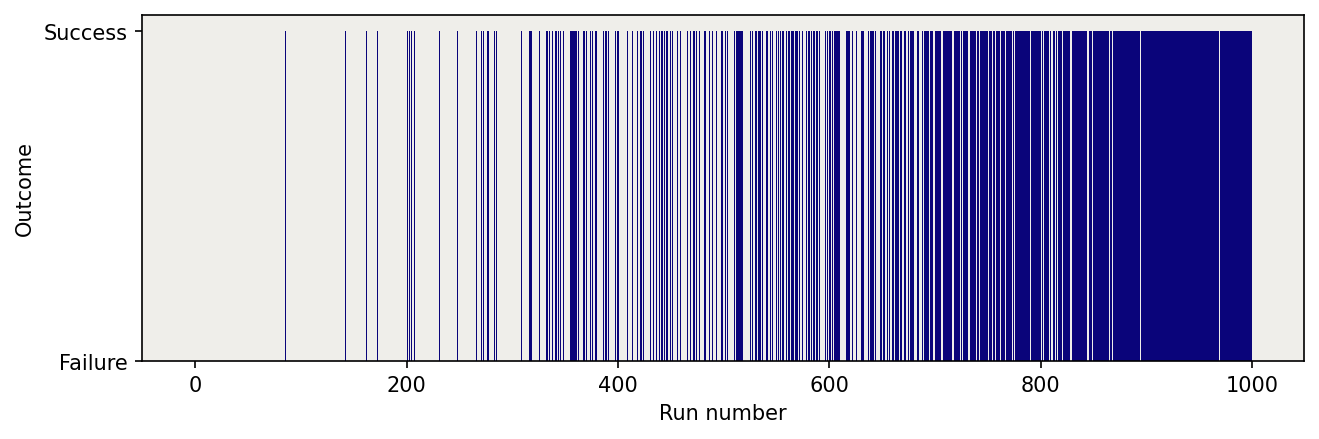

In [ ]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

# Training
nb_success = 0

for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")
print()

print('Q-table after training:')
print(qtable)
print()

# Plot outcomes
plt.figure(figsize=(10, 3))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

he agent takes more time to consistently win the game now! And the Q-table has a lot more non-zero values than the previous one, which means the agent has learned several sequences of actions to reach the goal.

###**6. slippery Frozen Lake**

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Success rate = 7.000000000000001%

Q-table after training:
[[0.07154593 0.024468   0.0239317  0.02502042]
 [0.00562045 0.01192128 0.01546256 0.02296839]
 [0.0247549  0.02384047 0.02491263 0.02507817]
 [0.0102391  0.01547491 0.01233384 0.02441004]
 [0.14618643 0.02221821 0.03444472 0.0261113 ]
 [0.         0.         0.         0.        ]
 [0.0233916  0.0342321  0.01716976 0.0066766 ]
 [0.         0.         0.         0.        ]
 [0.0303236  0.0323911  0.03105169 0.20623916]
 [0.03589271 0.33334356 0.06605647 0.09365374]
 [0.27534499 0.08448497 0.05451125 0.04797644]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.28765775 0.14436071 0.40294696 0.14419755]
 [0.35633462 0.76883055 0.34519605 0.3690479 ]
 [0.         0.         0.         0.        ]]



<BarContainer object of 1000 artists>

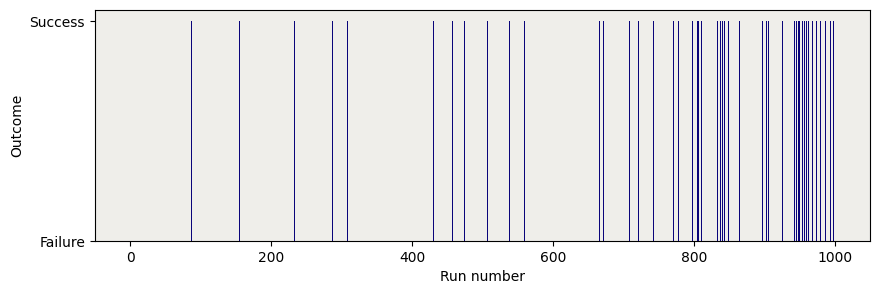

In [ ]:
environment = gym.make("FrozenLake-v1", is_slippery=True)

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []
nb_success = 0

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

print()
print('Q-table after training:')
print(qtable)
print()

# Plot outcomes
plt.figure(figsize=(10, 3))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)

#**Part II**

##**Recurrent Neural Network (RNN) and Long short-term memory (LSTM)**


##**Part A**

##**Long short-term memory (LSTM)**

###**Recurrent Neural Networks**

Recurrent Neural Networks (RNN) differ from feedforward neural networks by the presence of feedback connections where the flow of information occurs between neurons of the same layer or from higher layer neurons to lower layer neurons.

The presence of feedback connections makes RNNs able to perform tasks that require memory. This is because the network keeps information about its previous status. More specifically, the network at the time t transmits to itself the information to be used at the moment t+1 (together with the external input received in t+1). Therefore, the behavior of the network is influenced by the input it receives at a given instant, and by what happened to the network at the previous instant (in turn influenced by the previous instants).

###**LSTM Architecture**

The LSTM architecture consists of one unit, the memory unit (also known as LSTM unit). The LSTM unit is made up of four feedforward neural networks. Each of these neural networks consists of an input layer and an output layer. In each of these neural networks, input neurons are connected to all output neurons. As a result, the LSTM unit has four fully connected layers.

Three of the four feedforward neural networks are responsible for selecting information. They are the forget gate, the input gate, and the output gate. These three gates are used to perform the three typical memory management operations: the deletion of information from memory (the forget gate), the insertion of new information in memory (the input gate), and the use of information present in memory (the output gate).

The fourth neural network, the candidate memory, is used to create new candidate information to be inserted into the memory.



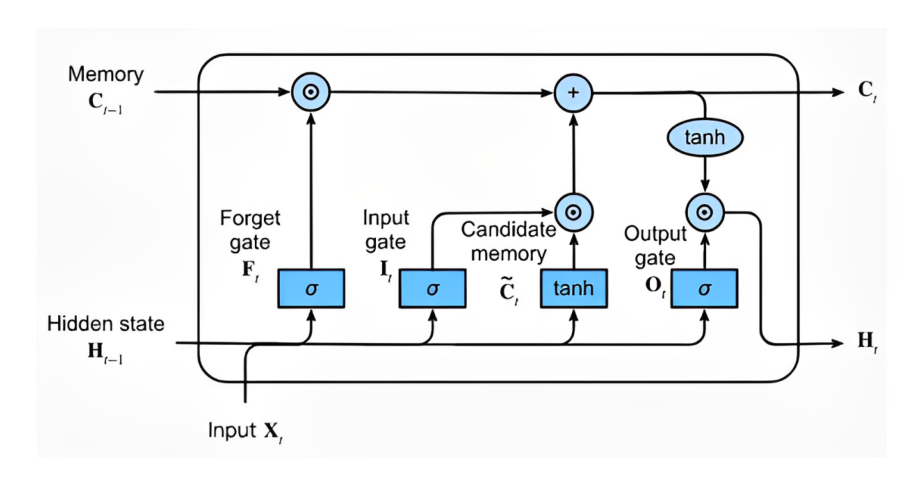

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/10.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

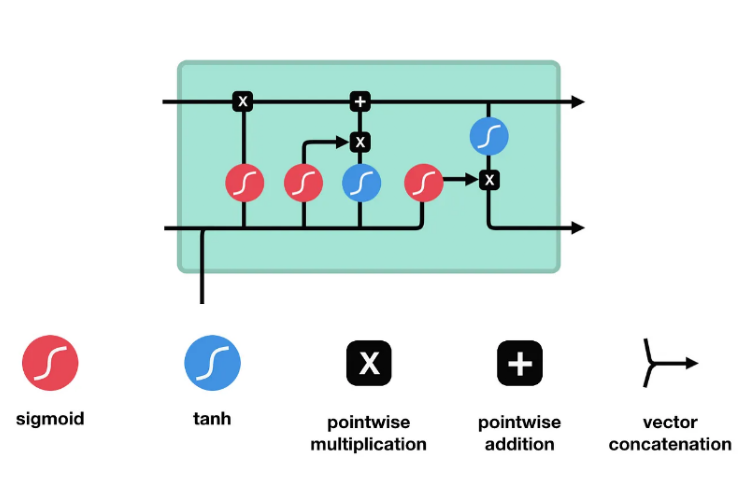

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/14.png')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

###**Input Output**

An LSTM unit receives three vectors (three lists of numbers) as input. Two vectors come from the LSTM itself and were generated by the LSTM at the previous instant (instant t − 1). These are the cell state (C) and the hidden state (H). The third vector comes from outside. This is the vector X (called input vector) submitted to the LSTM at instant t.

Given the three input vectors (C, H, X), the LSTM regulates, through the gates, the internal flow of information and transforms the values of the cell state and hidden state vectors. Vectors that will be part of the LSTM input set in the next instant (instant t+ 1). Information flow control is done so that the cell state acts as a long-term memory, while the hidden state acts as a short-term memory.

In practice, the LSTM unit uses recent past information (the short-term memory, H) and new information coming from the outside (the input vector, X) to update the long-term memory (cell state, C). Finally, it uses the long-term memory (the cell state, C) to update the short-term memory (the hidden state, H).

###**Gates**

The three gates (forget gate, input gate and output gate) are information selectors. Their task is to create selector vectors. A selector vector is a vector with values between zero and one and near these two extremes.

A selector vector is created to be multiplied, element by element, by another vector of the same size. This means that a position where the selector vector has a value equal to zero completely eliminates (in the multiplication element by element) the information included in the same position in the other vector. A position where the selector vector has a value equal to one leaves unchanged (in the multiplication element by element) the information included in the same position in the other vector.

All three gates are neural networks that use the sigmoid function as the activation function in the output layer. The sigmoid function is used to have, as output, a vector composed of values between zero and one and near these two extremes.

All three gates use the input vector X and the hidden state vector coming from the previous instant $H_{t−1}$ concatenated together in a single vector. This vector is the input of all three gates.

####**Forget Gate**

At any time t, an LSTM receives an input vector $X_t$ as an input. It also receives the hidden state $H_{t−1}$ and cell state $C_{t−1}$ vectors determined in the previous instant $t− 1$.

The first activity of the LSTM unit is executed by the forget gate. The forget gate decides (based on $X_t$ and $H_{t−1}$ vectors) what information to remove from the cell state vector coming from time $t− 1$. The outcome of this decision is a selector vector.



The information from the current input X(t) and hidden state h(t-1) are passed through the sigmoid function. Sigmoid generates values between 0 and 1. It concludes whether the part of the old output is necessary (by giving the output closer to 1). This value of f(t) will later be used by the cell for point-by-point multiplication.

$$f_t = \sigma(W_f \cdot x_t + U_f \cdot h_{t-1} + b_f)$$

* $f_t$: forget gate at timestep t
* $\sigma$: sigmoid function
* $W_f$: Weight matrix for input gate
* $U_f$: Weight matrix for hidden state
* $h_{t-1}$: Previous hidden state
* $x_t$: input at timestep t
* $b_f$: connection bias at timestep t

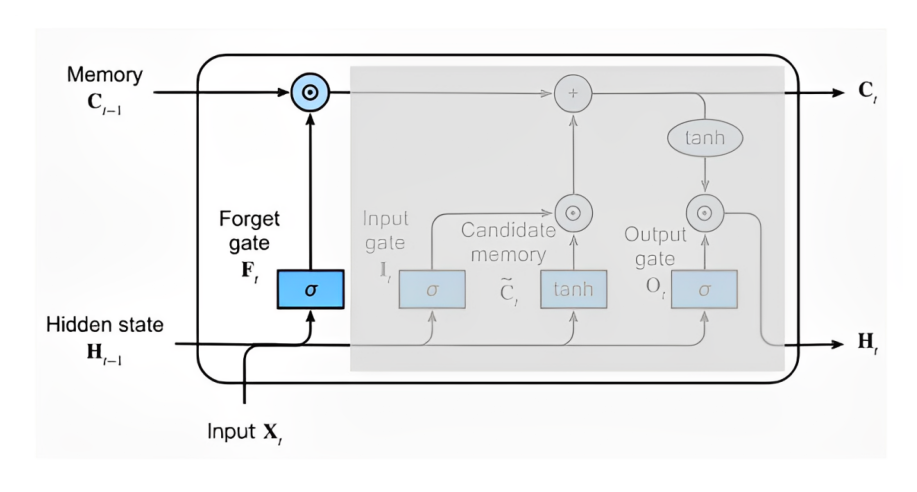

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/11.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);


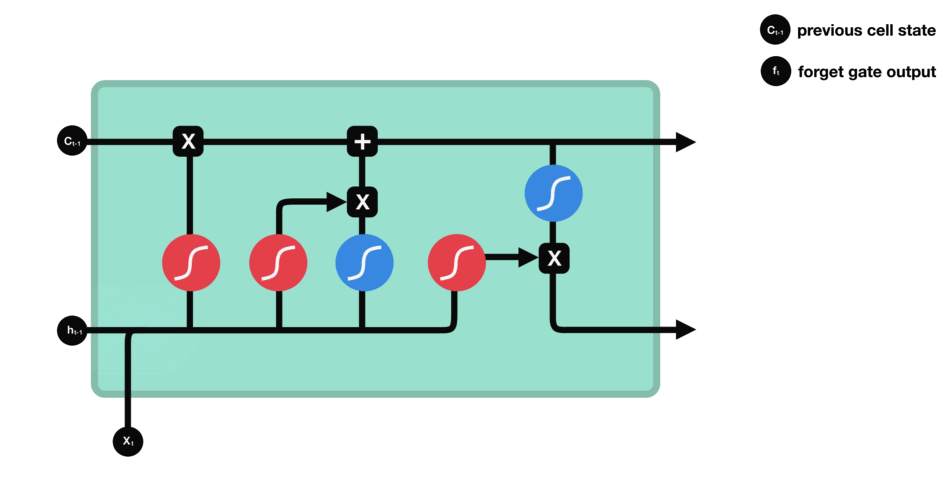

In [ ]:
gif_path = '/content/drive/MyDrive/AI/Project/Project_3/videos/1.gif'
show_gif(gif_path)

####**Input Gate, Candidate Cell and Cell state**

After removing some of the information from the cell state received in input $C_{t−1}$, we can insert a new one. This activity is carried out by two neural networks: the candidate memory and the input gate. The two neural networks are independent of each other. Their input are the vectors $X_t$ and $H_{t−1}$, concatenated together into a single vector.

The candidate memory is responsible for the generation of a candidate vector: a vector of information that is candidate to be added to the cell state.

Candidate memory output neurons use hyperbolic tangent function. The properties of this function ensure that all values of the candidate vector are between -1 and 1. This is used to normalize the information that will be added to the cell state.

The input gate is responsible for the generation of a selector vector which will be multiplied element by element with the candidate vector.

First, the current state $X_t$ and previously hidden state $H_{t-1}$ are passed into the second sigmoid function. The values are transformed between 0 (important) and 1 (not-important).

Next, the same information of the hidden state and current state will be passed through the tanh function. To regulate the network, the tanh operator will create a vector with all the possible values between -1 and 1. The output values generated form the activation functions are ready for point-by-point multiplication.

The result of the multiplication between the candidate vector and the selector vector is added to the cell state vector. This adds new information to the cell state.

The cell state, after being updated by the operations we have seen, is used by the output gate and passed into the input set used by the LSTM unit in the next instant $t+ 1$.

$$i_t = \sigma(W_i \cdot x_t + U_i \cdot h_{t-1}+ b_i)
\\
\tilde{C_t} = \tanh(W_C \cdot x_t + U_C \cdot h_{t-1} + b_C)
\\
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

* $t$: timestep
* $i_t$: input gate at t
* $W_i$: Weight matrix for input gate
* $U_i$ : Weight matrix for hidden state
* $b_i$: bias vector at t
* $\tilde{C_t}$: value generated by tanh
* $W_C$: Weight matrix for input gate
* $U_C$: Weight matrix for hidden state
* $b_C$: bias vector at t
* $f_t$: forget gate at ( t )
* $C_{t-1}$: Previous timestamp

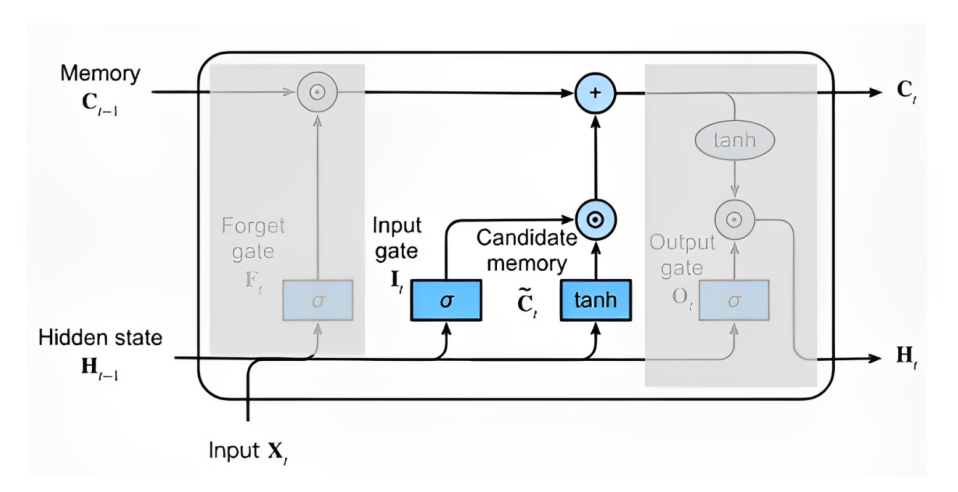

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/12.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);


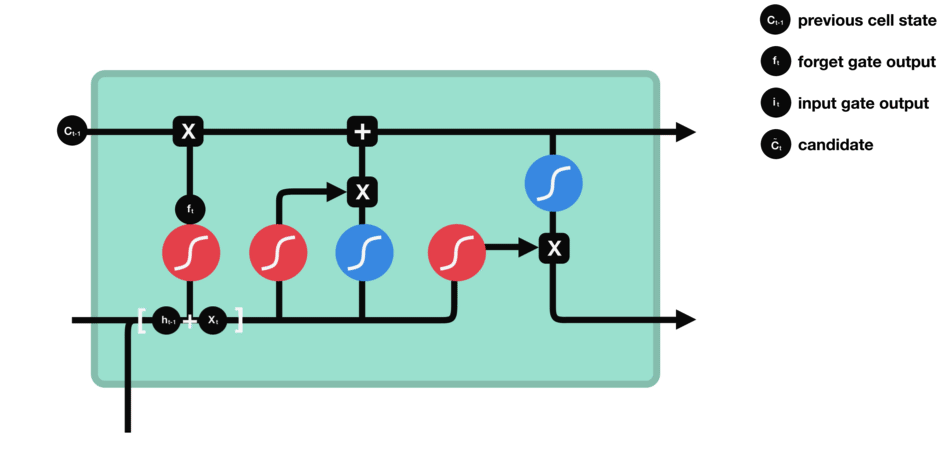

In [ ]:
gif_path = '/content/drive/MyDrive/AI/Project/Project_3/videos/2.gif'
show_gif(gif_path)


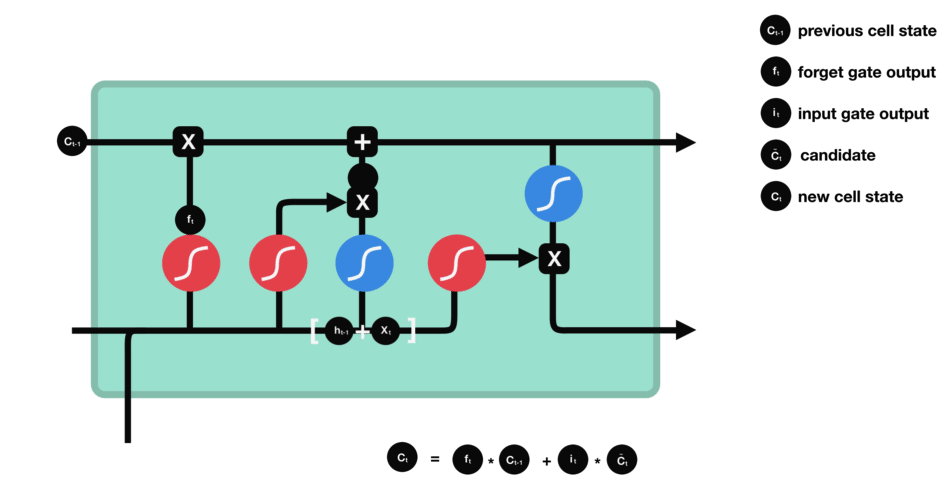

In [ ]:
gif_path = '/content/drive/MyDrive/AI/Project/Project_3/videos/3.gif'
show_gif(gif_path)

####**Output Gate and hidden state**

The output gate determines the value of the hidden state outputted by the LSTM (in instant t) and received by the LSTM in the next instant (t+1) input set.



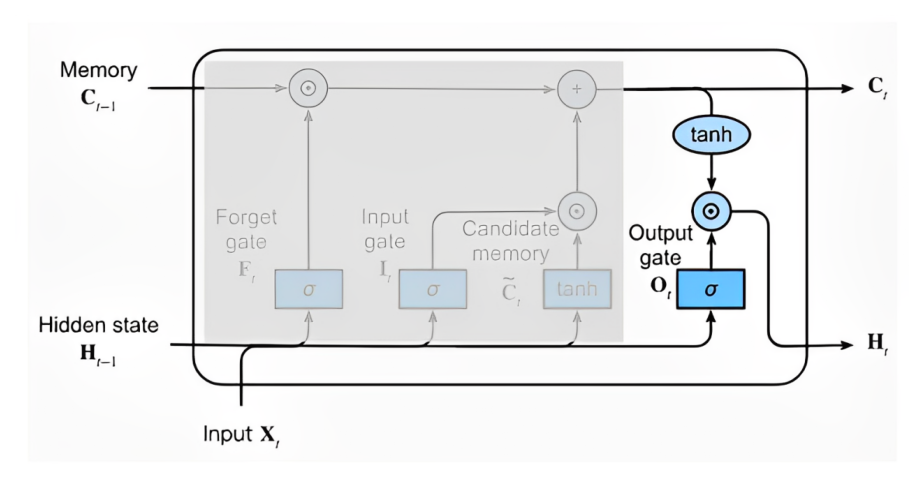

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/13.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);


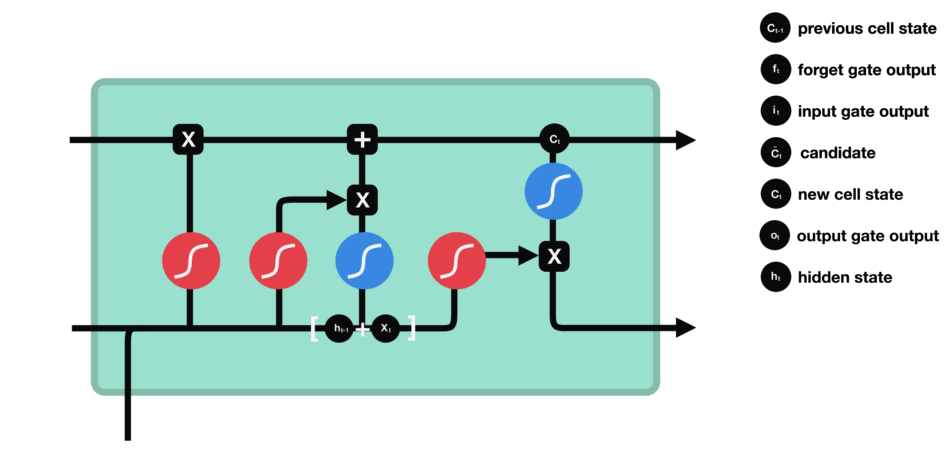

In [ ]:
gif_path = '/content/drive/MyDrive/AI/Project/Project_3/videos/4.gif'
show_gif(gif_path)

First, the values of the current state and previous hidden state are passed into the third sigmoid function. Then the new cell state generated from the cell state is passed through the tanh function. Both these outputs are multiplied point-by-point. Based upon the final value, the network decides which information the hidden state should carry. This hidden state is used for prediction.

Finally, the new cell state and new hidden state are carried over to the next time step.

$$o_t = \sigma(W_o \cdot x_t + U_o \cdot h_{t-1}+ b_o)
\\
h_t = o_t \cdot \tanh(C_t)
$$

* $t$: timestep
* $o_t$: output gate at t
* $W_o$: Weight matrix of input gate
* $U_o$: Weight matrix of hidden state
* $b_o$: bias vector
* $h_t$: LSTM output

###**Backpropagation Through Time**

The output Y of a neural network depends on a flow of information that passes through many elements placed in a chain. Each of these elements is made in such a way that a small increase in its output value affects the increase (or the decrease) of the output value of all subsequent elements until the output of the network (Y). The error minimization is done by calculating the ratio between the increase in the output value of a particular element and the increase in the network error. This activity is known as Backpropagation.

**Backpropagation Steps in LSTM**
* Forward Pass: Calculate the activations for each time step.
* Loss Calculation: Compute the loss at the final time step (or at each time step if required).
* Backward Pass (BPTT):
  * Compute the gradients of the loss with respect to the outputs, hidden states, and cell states.
  * Propagate these gradients backward through the time steps to compute the gradients with respect to the LSTM parameters (weights and biases).
* Parameter Update: Update the parameters using gradient descent or a variant (e.g., Adam).

####**Required Gradeints**

#####**Output Gradient($\delta_{h_t}$)**

In LSTM networks, the output at each time step $h_t$ is influenced not only by the current input and the current state but also by the gradients coming from both future time steps (due to the recurrent nature) and subsequent layers (due to the multi-layer structure).
Thus, the gradient $\delta_{h_t}$ combines contributions from:

* Future Time Steps: The gradient from the future time step, $Δ_{h_t}$, which accounts for the impact of $h_t$ on the loss at future time steps (via backpropagation through time).
* Subsequent Layers: The gradient from the subsequent layers, $\delta_t$ , which accounts for the impact of $h_t$ on the loss at the current time step (via standard backpropagation).

$$\delta_{h_t} = Δ_t + Δ_{h_t}$$

$Δ_t$: The output difference as computed by any subsequent layers.

$Δ_{h_t}$: The output difference as computed by the next time-step LSTM.

#####**State Gradeint($\delta_{C_t}$)**

The gradient of the cell state accounts for the output gate and the subsequent cell state gradient modified by the forget gate.

$$\delta_{C_t} = \delta_{h_t} \cdot o_t \cdot (1-tanh^2(\delta_{C_t})) + \delta_
{C_{t+1}} \cdot f_{t+1}$$

$\delta_{h_t} \cdot o_t \cdot (1-tanh^2(\delta_{C_t}))$:

$h_t = o_t \cdot \tanh(C_t)$

$\frac{\partial h_t}{\partial C_t} = o_t \cdot \left(1 - \tanh^2(C_t)\right)
$

\\

$\delta_{C_{t+1}} \cdot f_{t+1}$:

$\delta_{C_{t+1}}$: This represents the gradient flowing back from the next time step (t+1) with respect to the cell state. It signifies how changes in the cell state at time step t+1 affect the loss function.

$f_{T+1}$: This represents the forget gate at the next time step (t+1). The forget gate determines how much of the previous cell state $C_T$ is retained for the next time step.

Multiplying $\delta_{C_{t+1}}$ by $f_{T+1}$ essentially scales the influence of the gradient from the next time step by how much of the current cell state is retained (determined by the forget gate). This indicates how much the gradient at time step (t+1)affects the gradient of the cell state at time step t, considering how much of the previous cell state is retained.

#####**Candidate Activation Gradient($\delta_\tilde{C_t}$)**

The gradient with respect to the candidate activation $C_t$ is derived from the state gradient and the input gate.

$$\delta_\tilde{C_t} = \delta_{C_t} \cdot i_t \cdot (1-\tilde{C_t}^2)$$

#####**Input Gate Gradient($\delta_{i_t}$)**



This gradient accounts for the influence of the input gate on the state gradient.

$$\delta_{i_t} = \delta_{C_t} \cdot \tilde{C_t} \cdot i_t \cdot (1-i_t)$$

#####**Forget Gate Gradient($\delta_{f_t}$)**

The gradient for the forget gate involves the previous cell state and the forget gate’s contribution to the state gradient.

$$\delta_{f_t} = \delta_{C_t} \cdot C_{t-1} \cdot f_t \cdot (1-f_t)$$

#####**Output Gate Gradient($\delta_{o_t}$)**

The gradient with respect to the output gate involves the output gradient and the tanh activation of the cell state.

$$\delta_{o_t} = \delta_{h_t} \cdot tanh(C_t) \cdot o_t \cdot (1-o_t)$$

#####**Input Gradient($\delta_{x_t}$)**

This computes the gradient with respect to the input by backpropagating through the weights.

$$\delta_{x_t} = W^T \cdot δ_{gates_{t}}$$

#####**Delta Output Gradient for Previous Time Step($Δ_{h_{t-1}}$)**

This is the gradient propagated back to the output of the previous time step.

$$Δ_{h_{t-1}} = U^T \cdot δ_{gates_t}$$

####**Gradients for Parameters:**

#####**Weights($δ_W$)**

The gradients with respect to the weights are accumulated over all time steps.

$$\delta W = \sum_{t=0}^{T} \delta_{gates_t} \otimes x_t$$

#####**Recurrent Weights($δ_U$)**

The gradients with respect to the recurrent weights are accumulated over all time steps except the last one.

$$\delta U = \sum_{t=0}^{T-1} \delta_{gates_{t+1}} \otimes h_t$$

#####**Biases($δ_b$)**

The gradients with respect to the biases are summed over all time steps.

$$\delta W = \sum_{t=0}^{T} \delta_{gates_{t+1}}$$

###**Numerical Example**

####**1. Defining gates and vectors**

$$\begin{align*}
\text{gates} &= \left[ \begin{array}{c}
\tilde{C_t} \\
i_t \\
f_t \\
o_t \\
\end{array} \right], \quad
W&=\left[\begin{array}{c}
W_C \\
W_i \\
W_f \\
W_o \\
\end{array} \right], \quad
U &= \left[ \begin{array}{c}
U_C \\
U_i \\
U_f \\
U_o \\
\end{array} \right], \quad
b &= \left[ \begin{array}{c}
b_a \\
b_i \\
b_f \\
b_o \\
\end{array} 	\right]
\end{align*}$$

Internal Weights:

\begin{align*}
W_C &= \begin{bmatrix} 0.45 \\ 0.25 \\ 0.95 \end{bmatrix}, &
U_C &= \begin{bmatrix} 0.15 \end{bmatrix}, &
b_C &= \begin{bmatrix} 0.2 \end{bmatrix}, \\
W_i &= \begin{bmatrix} 0.8 \\ 0.8 \end{bmatrix}, &
U_i &= \begin{bmatrix} 0.8 \end{bmatrix}, &
b_i &= \begin{bmatrix} 0.65 \end{bmatrix}, \\
W_f &= \begin{bmatrix} 0.7 \\ 0.45 \end{bmatrix}, &
U_f &= \begin{bmatrix} 0.1 \end{bmatrix}, &
b_f &= \begin{bmatrix} 0.15 \end{bmatrix}, \\
W_o &= \begin{bmatrix} 0.6 \\ 0.4 \end{bmatrix}, &
U_o &= \begin{bmatrix} 0.25 \end{bmatrix}, &
b_o &= \begin{bmatrix} 0.1 \end{bmatrix}
\end{align*}

Input Data:

$$x_0 = \begin{bmatrix} 1 \\ 2 \\
\end{bmatrix} with \space label \space 0.5$$
\
$$x_1 = \begin{bmatrix} 0.5 \\ 3 \\
\end{bmatrix} with \space label \space 1.25$$

Continue forwarding through the LSTM as many steps as there are elements in the input sequence. (here, it is 2)


####**2. Forward t=0**

\begin{align*}
    \tilde{C_0} &= \tanh(W_C \cdot x_0 + U_C \cdot h_{-1} + b_C) = \tanh \left( \begin{bmatrix} 0.45 & 0.25 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 0.15 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.2 \end{bmatrix} \right) = 0.81775 \\
    i_0 &= \sigma(W_i \cdot x_0 + U_i \cdot h_{-1} + b_i) = \sigma \left( \begin{bmatrix} 0.95 & 0.8 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 0.8 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.65 \end{bmatrix} \right) = 0.96083 \\
    f_0 &= \sigma(W_f \cdot x_0 + U_f \cdot h_{-1} + b_f) = \sigma \left( \begin{bmatrix} 0.7 & 0.45 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 0.1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.15 \end{bmatrix} \right) = 0.85195 \\
    o_0 &= \sigma(W_o \cdot x_0 + U_o \cdot h_{-1} + b_o) = \sigma \left( \begin{bmatrix} 0.6 & 0.4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 0.25 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 \end{bmatrix} \right) = 0.81757 \\
    C_0 &= f_0 \cdot C_{-1} + i_0 \cdot \tilde{C}_0 = 0.81775 \times 0.96083 + 0.85195 \times 0 = 0.78572 \\
    h_0 &= o_0 \cdot \tanh(C_0) = \tanh(0.78572) \times 0.81757 = 0.53631
\end{align*}

From here, we can pass forward our state and output and begin the next time-step.

####**3. Forward t=1**

\begin{align*}
    \tilde{C_1} &= \tanh(W_C \cdot x_1 + U_C \cdot h_{0} + b_C) = \tanh \left( \begin{bmatrix} 0.45 & 0.25 \end{bmatrix} \begin{bmatrix} 0.5 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.15 & 0 \end{bmatrix} \begin{bmatrix} 0.53631 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.2 \end{bmatrix} \right) = 0.84980\\
    i_1 &= \sigma(W_i \cdot x_1 + U_i \cdot h_{0} + b_i) = \sigma \left( \begin{bmatrix} 0.95 & 0.8 \end{bmatrix} \begin{bmatrix} 0.5 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.8 & 0 \end{bmatrix} \begin{bmatrix} 0.53631 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.65 \end{bmatrix} \right) = 0.98118 \\
    f_1 &= \sigma(W_f \cdot x_1 + U_f \cdot h_{-1} + b_f) = \sigma \left( \begin{bmatrix} 0.7 & 0.45 \end{bmatrix} \begin{bmatrix} 0.5 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.1 & 0 \end{bmatrix} \begin{bmatrix} 0.53631 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.15 \end{bmatrix} \right) = 0.87030 \\
    o_1 &= \sigma(W_o \cdot x_1 + U_o \cdot h_{-1} + b_o) = \sigma \left( \begin{bmatrix} 0.6 & 0.4 \end{bmatrix} \begin{bmatrix} 0.5 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.25 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0.53631 \end{bmatrix} + \begin{bmatrix} 0.1 \end{bmatrix} \right) = 0.84993 \\
    C_1 &= f_1 \cdot C_{0} + i_1 \cdot \tilde{C}_1 = 0.84980 \times 0.98118 + 0.87030 \times 0.78572 = 1.5176 \\
    h_1 &= o_1 \cdot \tanh(C_1) = \tanh(1.5176) \times 0.84993 = 0.77197
\end{align*}


And since we’re done our sequence we have everything we need to begin backpropogating.

####**4. Backward t=1**

First we’ll need to compute the difference in output from the expected (label).

Note for this we’ll be using L2 Loss:



$$\Delta_1 = {\partial x}\space E = 0.7719 - 1.25 = -0.47803
\\
\Delta h_1 = 0 \text{ because there are no future time-steps.}
\\
\delta h_1 = \Delta_1 + \Delta h_1 = -0.47803 + 0 = -0.47803
\\
\delta_{C_1} = \delta_{h_1} \odot o_1 \odot (1 - \tanh^2(C_1)) + \delta_{C_2} \odot f_2 = -0.47803 \times 0.84993 \times (1 - \tanh^2(1.5176)) + 0 \times 0 = -0.07111
\\
\delta_\tilde{C_1} = \delta_{C_1} \odot i_1 \odot (1 - \tilde{C_1}^2) = -0.07111 \times 0.98118 \times (1 - 0.84980^2) = -0.01938
\\
\delta_{i_1} = \delta_{C_1} \odot \tilde{C_1} \odot i_1 \odot (1 - i_1) = -0.07111 \times 0.84980 \times 0.98118 \times (1 - 0.98118) = -0.00112
\\
\delta_{f_1} = \delta_{C_1} \odot C_0 \odot f_1 \odot (1 - f_1) = -0.07111 \times 0.78572 \times 0.87030 \times (1 - 0.87030) = -0.00631
\\
\delta_{o_1} = \delta_{h_1} \odot \tanh(C_1) \odot o_1 \odot (1 - o_1) = -0.47803 \times \tanh(1.5176) \times 0.84993 \times (1 - 0.84993) = -0.05538
\\
\delta_{x_1} = W^T \cdot \delta_{gates_1} =
\begin{bmatrix}
0.45 & 0.95 & 0.70 & 0.60 \\
0.25 & 0.80 & 0.45 & 0.40
\end{bmatrix}^T
\cdot
\begin{bmatrix}
-0.01938 \\
-0.00112 \\
-0.00631 \\
-0.05538
\end{bmatrix}
=
\begin{bmatrix}
-0.04743 \\
-0.03073
\end{bmatrix}
\\
\Delta_{h_0} = U^T \cdot \delta_{gates_1}
=
\begin{bmatrix}
0.15 & 0.80 & 0.10 & 0.25
\end{bmatrix}^T
\cdot
\begin{bmatrix}
-0.01938 \\
-0.00112 \\
-0.00631 \\
-0.05538
\end{bmatrix}
=
-0.01828
$$


####**5. Backward t=0**

$$\Delta_0 = {\partial x}\space E = 0.53631 - 0.5 = 0.03631
\\
\Delta h_0 = -0.01828 \space \text{passeed back frrom T=1}
\\
\delta h_0 = \Delta_0 + \Delta h_0 = 0.03631 - 0.01828 = 0.01803
\\
\delta_{C_0} = \delta_{h_0} \odot o_0 \odot (1 - \tanh^2(C_0)) + \delta_{C_1} \odot f_1 = 0.01803 \times 0.81757 \times (1 - \tanh^2(0.78572)) - 0.07111 \times 0.87030 = -0.05349
\\
\delta_\tilde{C_0} = \delta_{C_0} \odot i_0 \odot (1 - \tilde{C_0}^2) = -0.05349 \times 0.96083 \times (1 - 0.81755^2) = -0.01703
\\
\delta_{i_0} = \delta_{C_0} \odot \tilde{C_0} \odot i_0 \odot (1 - i_0) = -0.05349 \times 0.81755 \times 0.96083 \times (1 - 0.96083) = -0.00165
\\
\delta_{f_0} = \delta_{C_0} \odot C_{-1} \odot f_0 \odot (1 - f_0) = -0.05349 \times 0 \times 0.85195 \times (1 - 0.85195) = 0
\\
\delta_{o_0} = \delta_{h_0} \odot \tanh(C_0) \odot o_0 \odot (1 - o_0) = 0.1803 \times \tanh(0.78572) \times 0.81757 \times (1 - 0.81757) = -0.00176
\\
\delta_{x_0} = W^T \cdot \delta_{gates_0} =
\begin{bmatrix}
0.45 & 0.95 & 0.70 & 0.60 \\
0.25 & 0.80 & 0.45 & 0.40
\end{bmatrix}^T
\cdot
\begin{bmatrix}
-0.01703 \\
-0.00165 \\
-0 \\
0.00176
\end{bmatrix}
=
\begin{bmatrix}
-0.00817 \\
-0.00487
\end{bmatrix}
\\
\Delta_{h_{-1}} = U^T \cdot \delta_{gates_0}
=
\begin{bmatrix}
0.15 & 0.80 & 0.10 & 0.25
\end{bmatrix}^T
\cdot
\begin{bmatrix}
-0.01703 \\
-0.00165 \\
-0 \\
0.00176
\end{bmatrix}
=
-0.00343
$$


####**6. Update parameters**

And we’re done the backward step!

Now we’ll need to update our internal parameters according to whatever solving algorithm you’ve chosen. I’m going to use a simple Stochastic Gradient Descent (SGD) update with learning rate: λ=0.1.

We’ll need to compute how much our weights are going to change by:

$$\delta W = \sum_{t=0}^{T} \delta gates_{t} \otimes x_{t}
= \begin{bmatrix}
-0.01703 \\
-0.00165 \\
0 \\
0.00176
\end{bmatrix} [1.0 \ 2.0]
+ \begin{bmatrix}
-0.01938 \\
-0.00112 \\
-0.00631 \\
-0.05538
\end{bmatrix} [0.5 \ 3.0]
= \begin{bmatrix}
-0.02672 & -0.0922 \\
-0.00221 & -0.00666 \\
-0.00316 & 0.01893 \\
-0.02593 & -0.16262
\end{bmatrix}
\\
\delta U = \sum_{t=0}^{T-1} \delta gates_{t+1} \otimes out_{t}
= \begin{bmatrix}
-0.01938 \\
-0.00112 \\
-0.00631 \\
-0.05538
\end{bmatrix} [0.53631]
= \begin{bmatrix}
-0.01039 \\
-0.00060 \\
-0.00338 \\
-0.02970
\end{bmatrix}
\\
\delta b = \sum_{t=0}^{T} \delta gates_{t+1}
= \begin{bmatrix}
-0.01703 \\
-0.00165 \\
0 \\
0.00176
\end{bmatrix}
+ \begin{bmatrix}
-0.01938 \\
-0.00112 \\
-0.00631 \\
-0.05538
\end{bmatrix}
= \begin{bmatrix}
-0.03641 \\
-0.00277 \\
-0.00631 \\
-0.05362
\end{bmatrix}
$$


And updating out parameters based on the SGD update function:

$$W^{New} = W^{Old} - λδW^{Old}$$

\begin{align*}
W_C &= \begin{bmatrix} 0.45267 \\ 0.25922 \\ 0.95 \end{bmatrix}, &
U_C &= \begin{bmatrix} 0.15104 \end{bmatrix}, &
b_C &= \begin{bmatrix} 0.20364 \end{bmatrix}, \\
W_i &= \begin{bmatrix} 0.95022 \\ 0.80067 \end{bmatrix}, &
U_i &= \begin{bmatrix} 0.80006 \end{bmatrix}, &
b_i &= \begin{bmatrix} 0.65028 \end{bmatrix}, \\
W_f &= \begin{bmatrix} 0.70031 \\ 0.45189 \end{bmatrix}, &
U_f &= \begin{bmatrix} 0.10034 \end{bmatrix}, &
b_f &= \begin{bmatrix} 0.15063 \end{bmatrix}, \\
W_o &= \begin{bmatrix} 0.60259 \\ 0.41626 \end{bmatrix}, &
U_o &= \begin{bmatrix} 0.25297 \end{bmatrix}, &
b_o &= \begin{bmatrix} 0.10536 \end{bmatrix}
\end{align*}

##**Part B**

##**RNN-GRU-LSTM Model**

###**Part I**

###**Dataset from the Max Planck Institute for Biogeochemistry.**

In this part, we will be using the example data from the Max Planck Institute for Biogeochemistry. The dataset is called the Jena Climate dataset. It contains measurements like temperature, humidity, and more, recorded every 10 minutes. You have a dataset with measures on weather data, and we try to predict the temperature 12 hours (72-time steps of 10 minutes) into the future.We will use only the temperature data and not the other variables. This may make the task slightly harder to accomplish. Note that it is possible to add other explanatory variables into an RNN. For forecasting tomorrow’s temperature, you may want to use not only today’s temperature but also today’s wind direction, wind speed, and humidity, for example. In this case, you could add a third dimension to the input data.

####**1.Import libraries**

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

####**2.Import our data.**

In [ ]:
csv_path = "/content/drive/MyDrive/AI/Project/Project_3/datasets/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)

####**3. The next step is to delete all columns other than the temperature, as we are building a univariate model. Keeping only the temperature data.**

In [ ]:
df = df[['T (degC)']]

####**4. We apply the min-max scaler.**

 It scales and transforms each feature in a dataset individually to a given range, typically between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

####**5. We prepare our data and convert the list of lists to numpy array.We need to split the data into a shape in which we have sequences of past data and sequences of future data. We want to predict 72 steps into the future, and we’ll use 3*72 steps into the past.**

In [ ]:
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1



X_new = np.array(X_new)
y_new = np.array(y_new)

####**6.We do train test split.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

In [ ]:
X_train.shape

(378236, 216)

####**7. Adjust train and test values**

The SimpleRNN layer needs an input format that is 3D, and the shape has to correspond to (n_samples, n_timesteps, n_features). This can be obtained using reshape.

In [ ]:
n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

####**8.We parameterize a small network with SimpleRNN.**


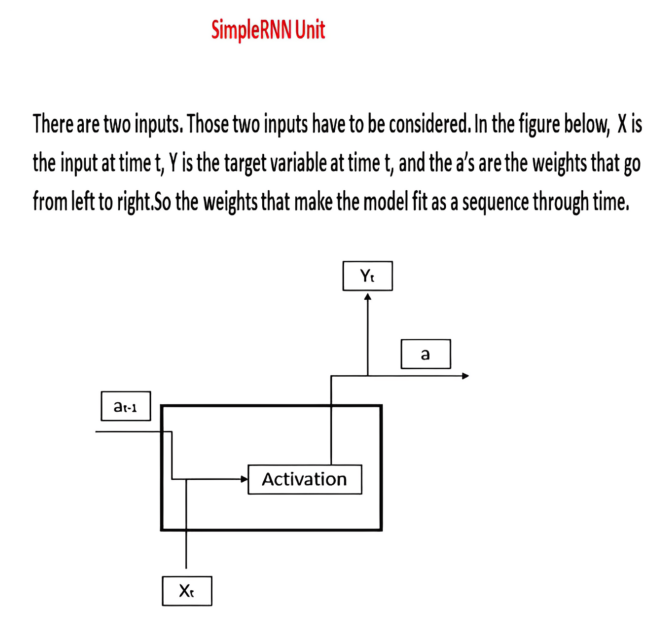

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/15.png')
plt.figure(figsize = (100,8))
plt.axis('off')
plt.imshow(image1);

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 216, 8)            80        
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 216, 8)            136       
                                                                 
 simple_rnn_30 (SimpleRNN)   (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 72)                648       
                                                                 
Total params: 1000 (3.91 KB)
Trainable params: 1000 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
606/606 [==============================] - 92s 148ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - val_loss: 0.0456 - val_mean_absolute_er

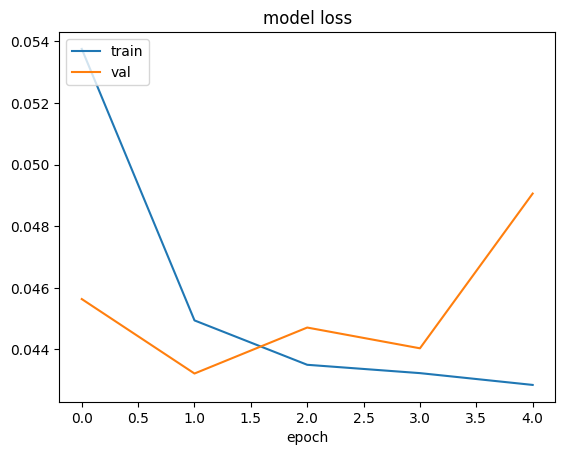

In [ ]:
random.seed(42)
batch_size = 500

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.5672940697686091


####**9.A simple architecture with 1 Gated Recurrent Unit (GRU) layer.**

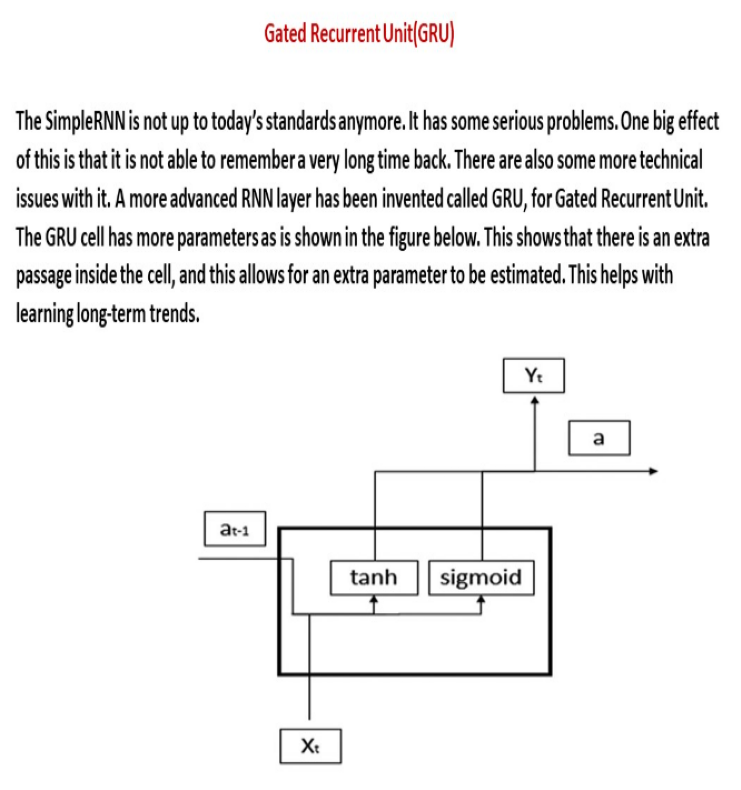

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/16.png')
plt.figure(figsize = (100,10))
plt.axis('off')
plt.imshow(image1);

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dense_6 (Dense)             (None, 72)                648       
                                                                 
Total params: 912 (3.56 KB)
Trainable params: 912 (3.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
606/606 [==============================] - 71s 113ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 2/5
606/606 [==============================] - 62s 102ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279
Epoch 3/5
606/606 [==============================] - 63s 104ms/step - loss: 0.0287 - mea

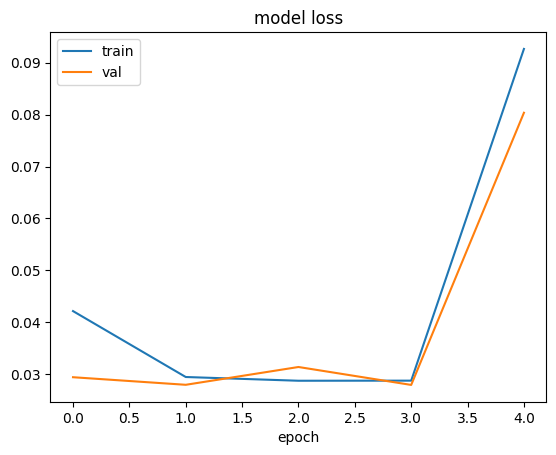

In [ ]:
batch_size = 500

random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.03389761780434626


####**10.This is a  more complex network with three layers of Gated Recurrent Unit (GRU).**

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_37 (GRU)                (None, 216, 10)           390       
                                                                 
 gru_38 (GRU)                (None, 216, 10)           660       
                                                                 
 gru_39 (GRU)                (None, 10)                660       
                                                                 
 dense_17 (Dense)            (None, 72)                792       
                                                                 
Total params: 2502 (9.77 KB)
Trainable params: 2502 (9.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
303/303 [==============================] - 194s 624ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - val_loss: 0.0481 - val_mean_absolute_

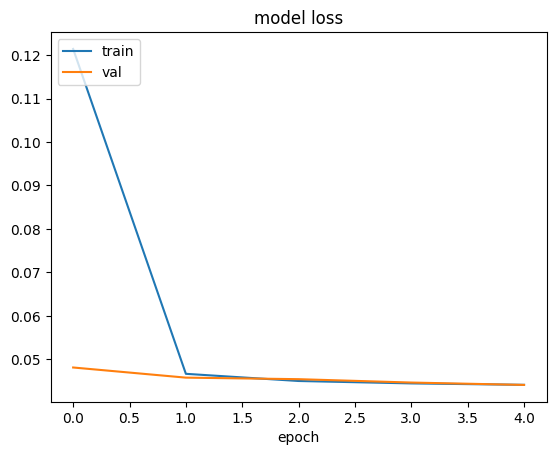

In [ ]:
batch_size = 1000
random.seed(42)

simple_model = Sequential([
   GRU(10, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(10, activation='tanh', return_sequences=True),
    GRU(10, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.6824748061688565


###**Improve R2 score**

####**Simple RNN Unit**

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_39 (SimpleRNN)   (None, 216, 8)            80        
                                                                 
 simple_rnn_40 (SimpleRNN)   (None, 216, 8)            136       
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 216, 8)            136       
                                                                 
 simple_rnn_42 (SimpleRNN)   (None, 216, 8)            136       
                                                                 
 simple_rnn_43 (SimpleRNN)   (None, 216, 8)            136       
                                                                 
 simple_rnn_44 (SimpleRNN)   (None, 216, 8)            136       
                                                                 
 simple_rnn_45 (SimpleRNN)   (None, 216, 8)          

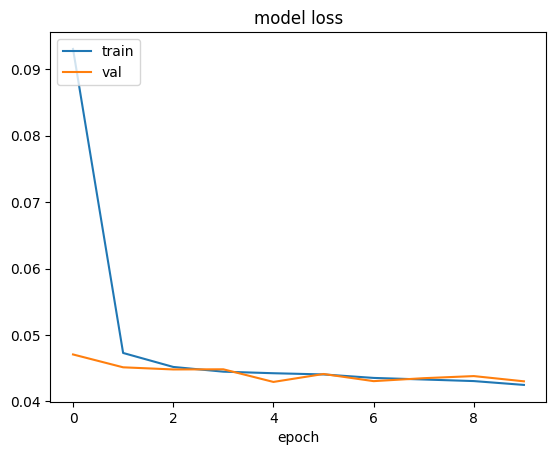

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

csv_path = "/content/drive/MyDrive/AI/Project/Project_3/datasets/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)

df = df[['T (degC)']]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

X_new = np.array(X_new)
y_new = np.array(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

#I have changed number of batch_size here!
batch_size = 2000

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

random.seed(42)

#I have changed number of layers here!
simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

#I have changed number of epochs here!
smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

By changing number of layers, number of epochs and number of batch size, we can see improve in R2 score


In [ ]:
print(r2_score(preds, y_test))

0.7267218925784549


####**Simple Gru Unit**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 72)                648       
                                                                 
Total params: 912 (3.56 KB)
Trainable params: 912 (3.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
606/606 [==============================] - 81s 130ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - val_loss: 0.0398 - val_mean_absolute_error: 0.0398
Epoch 2/5
606/606 [==============================] - 73s 120ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 3/5
606/606 [==============================] - 74s 122ms/step - loss: 0.0295 - mea

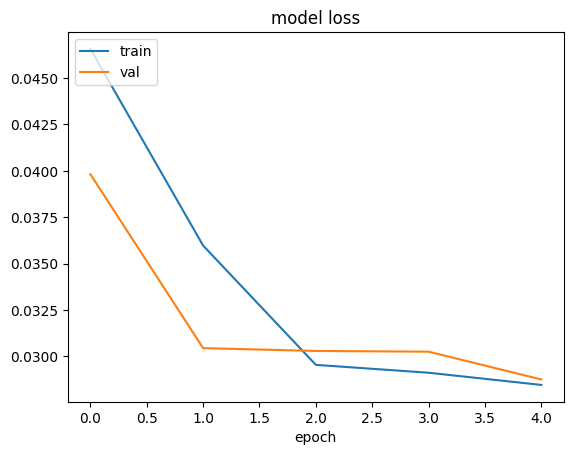

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

csv_path = "/content/drive/MyDrive/AI/Project/Project_3/datasets/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)

df = df[['T (degC)']]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

X_new = np.array(X_new)
y_new = np.array(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

#I have changed number of batch_size here!
batch_size = 500

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

By incrasing number of epochs, We can see improve in R2 score.

In [ ]:
print(r2_score(preds, y_test))

0.7952495973335397


####**Complex Gru Unit**

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_53 (GRU)                (None, 216, 10)           390       
                                                                 
 gru_54 (GRU)                (None, 216, 10)           660       
                                                                 
 gru_55 (GRU)                (None, 216, 10)           660       
                                                                 
 gru_56 (GRU)                (None, 216, 10)           660       
                                                                 
 gru_57 (GRU)                (None, 10)                660       
                                                                 
 dense_21 (Dense)            (None, 72)                792       
                                                                 
Total params: 3822 (14.93 KB)
Trainable params: 3822 

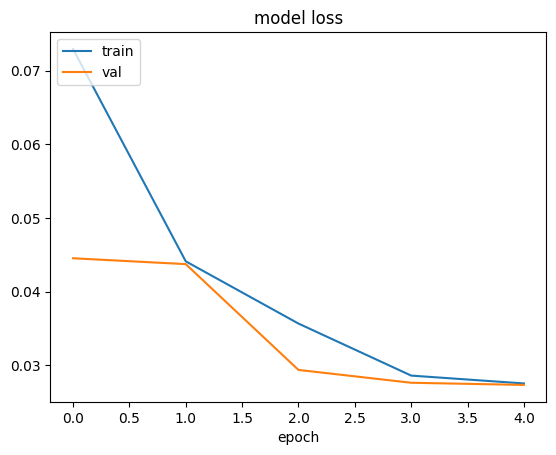

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

csv_path = "/content/drive/MyDrive/AI/Project/Project_3/datasets/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)

df = df[['T (degC)']]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

X_new = np.array(X_new)
y_new = np.array(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

#I have changed number of batch_size here!
batch_size = 300

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

random.seed(42)

simple_model = Sequential([
   GRU(10, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
   GRU(10, activation='tanh', return_sequences=True),
   GRU(10, activation='tanh', return_sequences=True),
   GRU(10, activation='tanh', return_sequences=True),
  GRU(10, activation='tanh'),
  Dense(y_train.shape[1]),
])
simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

By decrasing number of epochs, We can see improve in R2 score.

In [ ]:
print(r2_score(preds, y_test))

0.917153888609538


###**Part II**

###**Stock market data(SP500)**

In this part, we will employ LSTM.This section uses the stock market data(SP500).

####**1. Import libraries.**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

####**2. We normalize the dataset and do train and test split.**

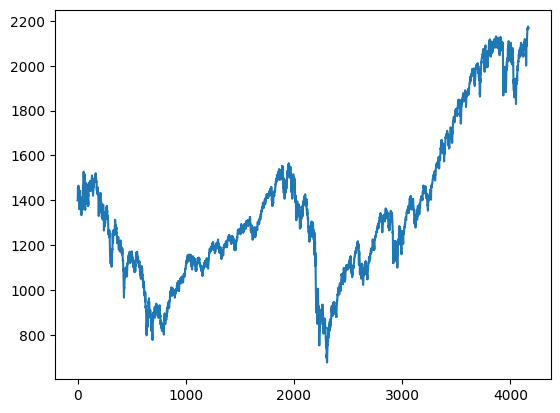

2791 1376


In [ ]:
dataset = pandas.read_csv('/content/drive/MyDrive/AI/Project/Project_3/datasets/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

####**3. We convert an array of values into a timeseries data.**

The look_back parameter determines the number of previous time steps to use as input variables to predict the next time period. This is the so-called window width or size of the sliding window.

This way, the LSTM model can learn the temporal context from the sequence of inputs over time, which is crucial for making accurate predictions. This is why we need to convert data into timeseries data when working with LSTM models.

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2789, 1)

####**4. We reshape input to be [samples, time steps, features].**

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

####**5.We create and fit the LSTM network.**

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 3s - loss: 0.0519 - 3s/epoch - 9ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0110 - 850ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0083 - 942ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 0.0054 - 1s/epoch - 4ms/step
Epoch 5/100
279/279 - 1s - loss: 0.0027 - 1s/epoch - 4ms/step
Epoch 6/100
279/279 - 1s - loss: 9.4320e-04 - 1s/epoch - 4ms/step
Epoch 7/100
279/279 - 1s - loss: 2.9176e-04 - 904ms/epoch - 3ms/step
Epoch 8/100
279/279 - 1s - loss: 1.6728e-04 - 831ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 1.5402e-04 - 846ms/epoch - 3ms/step
Epoch 10/100
279/279 - 1s - loss: 1.5349e-04 - 833ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 1.5264e-04 - 845ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.4986e-04 - 842ms/epoch - 3ms/step
Epoch 13/100
279/279 - 1s - loss: 1.4724e-04 - 832ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.4548e-04 - 837ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.4231e-04 - 839ms/epoch - 

####**6.We rescale predicted values and compute the root mean squared error.**

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

43/43 [==============================] - 0s 2ms/step
Train Score: 14.95 RMSE
Test Score: 45.30 RMSE


####**7. We shift train and test predictions for plotting and plot baseline and predictions.The part in orange is the training data, the part in blue is the test data, and the part in green is the predicted output.**

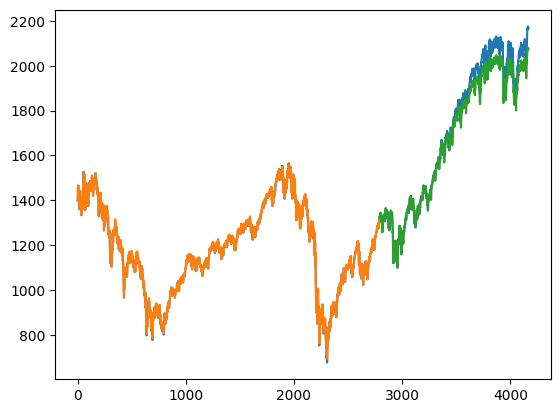

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

###**Improve train and test score**

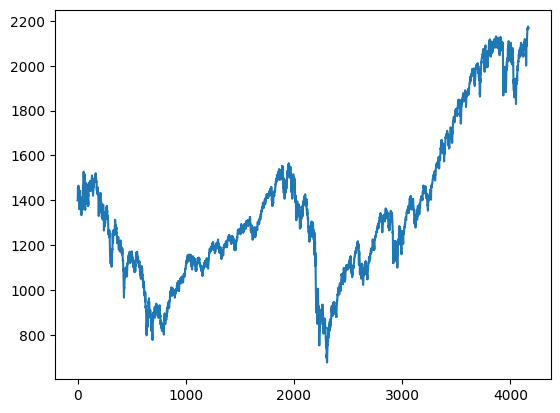

Epoch 1/100
279/279 - 2s - loss: 0.0192 - 2s/epoch - 9ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0037 - 838ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0015 - 826ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 3.4398e-04 - 1s/epoch - 4ms/step
Epoch 5/100
279/279 - 1s - loss: 1.2685e-04 - 1s/epoch - 4ms/step
Epoch 6/100
279/279 - 1s - loss: 1.1282e-04 - 1s/epoch - 4ms/step
Epoch 7/100
279/279 - 1s - loss: 1.1157e-04 - 977ms/epoch - 4ms/step
Epoch 8/100
279/279 - 1s - loss: 1.1115e-04 - 821ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 1.1054e-04 - 834ms/epoch - 3ms/step
Epoch 10/100
279/279 - 1s - loss: 1.1051e-04 - 847ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 1.1085e-04 - 840ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.1077e-04 - 827ms/epoch - 3ms/step
Epoch 13/100
279/279 - 1s - loss: 1.1071e-04 - 818ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.0834e-04 - 824ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.1089e-04 - 824ms/

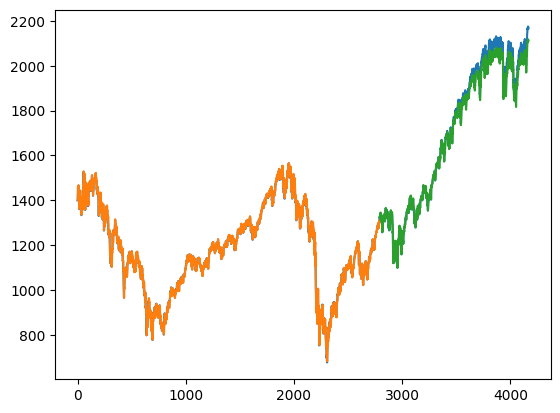

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

dataset = pandas.read_csv('/content/drive/MyDrive/AI/Project/Project_3/datasets/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

As We see, by increasing number of cells in LSTM, RMSE decreased and improved.

#**Part III**

#**Search Algorithms**

##**A* Search**

A Heuristic (or a heuristic function) takes a look at search algorithms. At each branching step, it evaluates the available information and makes a decision on which branch to follow.

It does so by ranking alternatives. The Heuristic is any device that is often effective but will not guarantee work in every case.

###**Example 1**

####**Motivation**

To approximate the shortest path in real-life situations, like- in maps, games where there can be many hindrances.
We can consider a 2D Grid having several obstacles and we start from a source cell (colored red below) to reach towards a goal cell (colored green below)

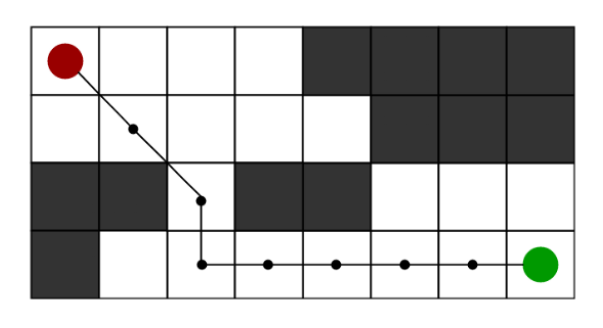

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/17.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

####**Explanation**

Consider a square grid having many obstacles and we are given a starting cell and a target cell. We want to reach the target cell (if possible) from the starting cell as quickly as possible. Here A* Search Algorithm comes to the rescue.

What A* Search Algorithm does is that at each step it picks the node according to a value-‘f’ which is a parameter equal to the sum of two other parameters – ‘g’ and ‘h’. At each step it picks the node/cell having the lowest ‘f’, and process that node/cell.

We define ‘g’ and ‘h’ as simply as possible below:

g = the movement cost to move from the starting point to a given square on the grid, following the path generated to get there.

h = the estimated movement cost to move from that given square on the grid to the final destination.

####**Algorithm**

```
1.  Initialize the open list
2.  Initialize the closed list

    put the starting node on the open list
3.  while the open list is not empty

    a) find the node with the least f on the open list, call it "q"

    b) pop q off the open list

    c) generate q's 8 successors and set their parents to q
   
    d) for each successor

        i) if successor is the goal, stop search
        
        ii) else, compute both g and h for successor
          successor.g = q.g + distance between successor and q
          successor.h = distance from goal to successor
          successor.f = successor.g + successor.h

        iii) if a node with the same position as successor is in the OPEN list which has a lower f than successor, skip this successor
        
        iV) if a node with the same position as successor is in the CLOSED list which has a lower f than successor, skip this successor
            otherwise, add  the node to the open list
     end (for loop)
  
    e) push q on the closed list
    end (while loop)
```

####**Approximation Heuristics**

**1. Manhattan Distance**

It is nothing but the sum of absolute values of differences in the goal’s x and y coordinates and the current cell’s x and y coordinates respectively, i.e.,

```
 h = abs (current_cell.x – goal.x) + abs (current_cell.y – goal.y)
```



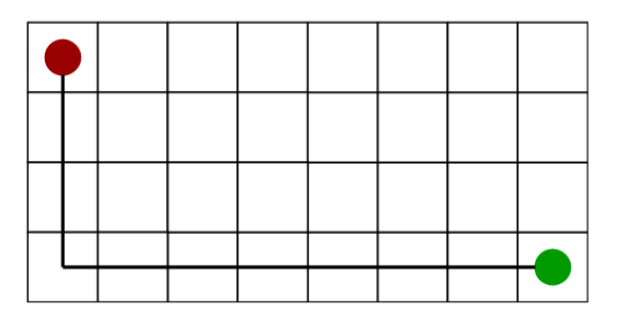

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/18.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

**2. Diagonal Distance**

It is nothing but the maximum of absolute values of differences in the goal’s x and y coordinates and the current cell’s x and y coordinates respectively, i.e.,
```
dx = abs(current_cell.x – goal.x)
dy = abs(current_cell.y – goal.y)

h = D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
where D is length of each node(usually = 1) and D2 is diagonal distance between each node (usually = sqrt(2) ).
```

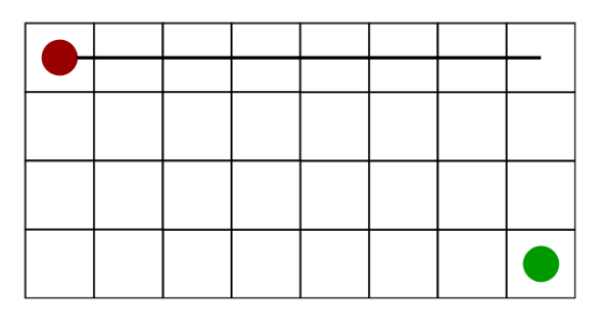

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/19.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

**3. Euclidean Distance**

As it is clear from its name, it is nothing but the distance between the current cell and the goal cell using the distance formula

```
 h = sqrt ( (current_cell.x – goal.x)2 + (current_cell.y – goal.y)2 )
```



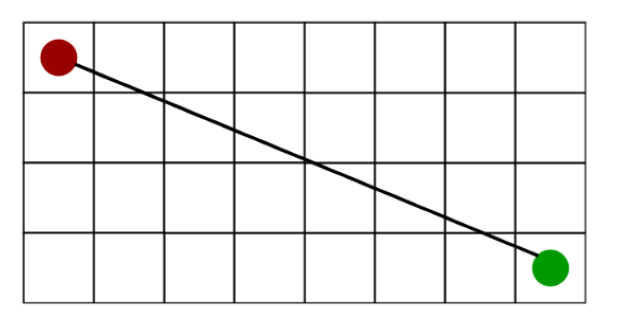

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/20.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

####**Implementation**

######**1.Import Necessary libraries**

In [ ]:
import math
import heapq

#####**2. Define Cell class**

In [ ]:
class Cell:
	def __init__(self):
		self.parent_i = 0 # Parent cell's row index
		self.parent_j = 0 # Parent cell's column index
		self.f = float('inf') # Total cost of the cell (g + h)
		self.g = float('inf') # Cost from start to this cell
		self.h = 0 # Heuristic cost from this cell to destination

#####**3. Define the size of grid**

In [ ]:
ROW = 9
COL = 10

#####**4. Check current block state**

In [ ]:
# Check if a cell is valid (within the grid)
def is_valid(row, col):
	return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
	return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
	return row == dest[0] and col == dest[1]

#####**5. Calculate the heuristic value of a cell (Euclidean distance to destination)**

In [ ]:
def calculate_h_value(row, col, dest):
	return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

#####**6. Trace the path from source to destination**

In [ ]:
def trace_path(cell_details, dest):
	print("The Path is ")
	path = []
	row = dest[0]
	col = dest[1]

	# Trace the path from destination to source using parent cells
	while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
		path.append((row, col))
		temp_row = cell_details[row][col].parent_i
		temp_col = cell_details[row][col].parent_j
		row = temp_row
		col = temp_col

	# Add the source cell to the path
	path.append((row, col))
	# Reverse the path to get the path from source to destination
	path.reverse()

	# Print the path
	for i in path:
		print("->", i, end=" ")
	print()

#####**7. Implement the A* search algorithm**

In [ ]:
def a_star_search(grid, src, dest):
	# Check if the source and destination are valid
	if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
		print("Source or destination is invalid")
		return

	# Check if the source and destination are unblocked
	if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
		print("Source or the destination is blocked")
		return

	# Check if we are already at the destination
	if is_destination(src[0], src[1], dest):
		print("We are already at the destination")
		return

	# Initialize the closed list (visited cells)
	closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
	# Initialize the details of each cell
	cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

	# Initialize the start cell details
	i = src[0]
	j = src[1]
	cell_details[i][j].f = 0
	cell_details[i][j].g = 0
	cell_details[i][j].h = 0
	cell_details[i][j].parent_i = i
	cell_details[i][j].parent_j = j

	# Initialize the open list (cells to be visited) with the start cell
	open_list = []
	heapq.heappush(open_list, (0.0, i, j))

	# Initialize the flag for whether destination is found
	found_dest = False

	# Main loop of A* search algorithm
	while len(open_list) > 0:
		# Pop the cell with the smallest f value from the open list
		p = heapq.heappop(open_list)

		# Mark the cell as visited
		i = p[1]
		j = p[2]
		closed_list[i][j] = True

		# For each direction, check the successors
		directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
		for dir in directions:
			new_i = i + dir[0]
			new_j = j + dir[1]

			# If the successor is valid, unblocked, and not visited
			if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
				# If the successor is the destination
				if is_destination(new_i, new_j, dest):
					# Set the parent of the destination cell
					cell_details[new_i][new_j].parent_i = i
					cell_details[new_i][new_j].parent_j = j
					print("The destination cell is found")
					# Trace and print the path from source to destination
					trace_path(cell_details, dest)
					found_dest = True
					return
				else:
					# Calculate the new f, g, and h values
					g_new = cell_details[i][j].g + 1.0
					h_new = calculate_h_value(new_i, new_j, dest)
					f_new = g_new + h_new

					# If the cell is not in the open list or the new f value is smaller
					if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
						# Add the cell to the open list
						heapq.heappush(open_list, (f_new, new_i, new_j))
						# Update the cell details
						cell_details[new_i][new_j].f = f_new
						cell_details[new_i][new_j].g = g_new
						cell_details[new_i][new_j].h = h_new
						cell_details[new_i][new_j].parent_i = i
						cell_details[new_i][new_j].parent_j = j

	# If the destination is not found after visiting all cells
	if not found_dest:
		print("Failed to find the destination cell")

#####**8. Test**

In [ ]:
def main():
	# Define the grid (1 for unblocked, 0 for blocked)
	grid = [
		[1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
		[1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
		[1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
		[0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
		[1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
		[1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
		[1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
		[1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
	]

	# Define the source and destination
	src = [8, 0]
	dest = [0, 0]

	# Run the A* search algorithm
	a_star_search(grid, src, dest)

if __name__ == "__main__":
	main()


The destination cell is found
The Path is 
-> (8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) 


###**Example 2**

####**Problem Description**

we are going to find out how the A* search algorithm can be used to find the most cost-effective path in a graph. Consider the following graph below.

The numbers written on edges represent the distance between the nodes, while the numbers written on nodes represent the heuristic values.

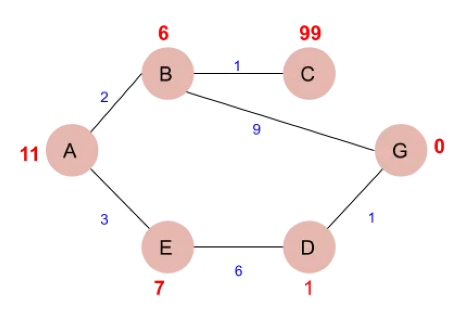

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/21.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

####**Implementation**

#####**1. Implement A* algorithm**

In [ ]:
def aStarAlgo(start_node, stop_node):

        open_set = set(start_node)
        closed_set = set()
        g = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes

        #ditance of starting node from itself is zero
        g[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node


        while len(open_set) > 0:
            n = None

            #node with lowest f() is found
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v


            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight


                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        if g[m] > g[n] + weight:
                            #update g(m)
                            g[m] = g[n] + weight
                            #change parent of m to n
                            parents[m] = n

                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                path = []

                while parents[n] != n:
                    path.append(n)
                    n = parents[n]

                path.append(start_node)

                path.reverse()

                print('Path found: {}'.format(path))
                return path


            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)

        print('Path does not exist!')
        return None

#####**2. Define fuction to return neighbor and its distance from the passed node**

In [ ]:
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

#####**3. Define function to return heuristic distance for all nodes**

In [ ]:
def heuristic(n):
        H_dist = {
            'A': 11,
            'B': 6,
            'C': 99,
            'D': 1,
            'E': 7,
            'G': 0,
        }

        return H_dist[n]

#####**4. Describe graph and test**

In [ ]:
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],

}
path = aStarAlgo('A', 'G')

Path found: ['A', 'E', 'D', 'G']


##**Min-Max Search**

###**Sequence of tree processing using A* search**

####**Example 1**

#####**Problem Description**

Here, one player (the AI) uses the A* algorithm to find the optimal path. The game is a grid-based game where the players start at opposite corners and aim to reach each other's starting position.

* 0: Represents a free space where the player or AI can move.
* 1: Represents an obstacle that blocks movement; the player and AI cannot move through these cells.

#####**Implementation**

######**1. Import Necessary libraries**

In [ ]:
import heapq

######**2. Define a class for each block of the grid**

In [ ]:
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Distance from start node
        self.h = 0  # Heuristic distance to end node
        self.f = 0  # Total cost

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

######**3. Function to calculate heuristic distance**

In [ ]:
def heuristic(start, end):
    return abs(start[0] - end[0]) + abs(start[1] - end[1])

######**4. Function to imply A* algorithm**

In [ ]:
def astar(grid, start, end):
    start_node = Node(start)
    end_node = Node(end)

    open_list = []
    closed_list = set()
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.add(current_node.position)

        if current_node == end_node:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        (x, y) = current_node.position
        neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        for next_position in neighbors:
            if next_position[0] < 0 or next_position[0] >= len(grid) or next_position[1] < 0 or next_position[1] >= len(grid[0]):
                continue
            if grid[next_position[0]][next_position[1]] != 0:
                continue

            neighbor = Node(next_position, current_node)
            if neighbor.position in closed_list:
                continue

            neighbor.g = current_node.g + 1
            neighbor.h = heuristic(neighbor.position, end_node.position)
            neighbor.f = neighbor.g + neighbor.h

            if add_to_open(open_list, neighbor):
                heapq.heappush(open_list, neighbor)

    return None

######**5. The add_to_open function in this context is used to determine whether a neighboring node should be added to the open list**

In [ ]:
def add_to_open(open_list, neighbor):
    for node in open_list:
        if neighbor == node and neighbor.g > node.g:
            return False
    return True

######**6. Function to print final grid**

In [ ]:
def print_grid(grid, path):
    for position in path:
        grid[position[0]][position[1]] = '*'
    for row in grid:
        print(" ".join(str(cell) for cell in row))

######**7. Test**

In [ ]:
def main():
    grid = [
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]
    ]

    start = (0, 0)
    end = (4, 4)

    path = astar(grid, start, end)
    if path:
        print("Path found:")
        print_grid(grid, path)
    else:
        print("No path found.")

if __name__ == "__main__":
    main()


Path found:
* * * * *
1 1 1 1 *
* * * * *
* 1 1 1 1
* * * * *


####**Example 2**

#####**Problem Description**

**1D Path Point Collection Game**

In this game:

* Players start at the beginning of a 1D list of points.
* The goal is to collect as many points as possible by moving along the list.
* The human player moves manually, while the AI uses the A* algorithm to determine the best path.

#####**Implementation**

######**1. Import Necessary libraries**

In [ ]:
import heapq

######**2. Define a class for point on the line**

In [ ]:
class Node:
    def __init__(self, position, points, parent=None):
        self.position = position
        self.points = points
        self.parent = parent
        self.g = 0  # Collected points
        self.h = 0  # Heuristic (estimated remaining points)
        self.f = 0  # Total estimated points (g + h)

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

######**3. Function to calculate heuristic distance**

In [ ]:
def heuristic(points_list, position):
    return sum(points_list[position:])

######**4. Function to imply A* algorithm**

In [ ]:
def astar(points_list, start, end):
    start_node = Node(start, points_list[start])
    end_node = Node(end, 0)

    open_list = []
    closed_list = set()
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.add(current_node.position)

        if current_node.position == end_node.position:
            path = []
            total_points = current_node.points
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], total_points

        neighbors = [current_node.position + 1, current_node.position + 2]  # Move to next or skip one

        for next_position in neighbors:
            if next_position > end_node.position:
                continue

            neighbor = Node(next_position, current_node.points + points_list[next_position], current_node)
            if neighbor.position in closed_list:
                continue

            neighbor.g = current_node.points + points_list[next_position]
            neighbor.h = heuristic(points_list, neighbor.position)
            neighbor.f = neighbor.g + neighbor.h

            if add_to_open(open_list, neighbor):
                heapq.heappush(open_list, neighbor)

    return None, 0

######**5. The add_to_open function in this context is used to determine whether a neighboring node should be added to the open list**

In [ ]:
def add_to_open(open_list, neighbor):
    for node in open_list:
        if neighbor == node and neighbor.g > node.g:
            return False
    return True

######**6. Test**

In [ ]:
def main():
    points_list = [0, 3, 2, 5, 8, 6, 1, 4, 7, 9, 0]
    start_position = 0
    end_position = len(points_list) - 1

    ai_path, ai_points = astar(points_list, start_position, end_position)
    if ai_path:
        print("AI Path found:", ai_path)
        print("AI Total Points:", ai_points)
    else:
        print("No path found for AI.")

if __name__ == "__main__":
    main()

AI Path found: [0, 2, 4, 6, 8, 10]
AI Total Points: 18


###**Sequence of tree processing using min-max search**

####**Example 1**

Minimax is a kind of backtracking algorithm that is used in decision making and game theory to find the optimal move for a player, assuming that your opponent also plays optimally.

In Minimax the two players are called maximizer and minimizer. The **maximizer** tries to get the highest score possible while the **minimizer** tries to do the opposite and get the lowest score possible.

Every board state has a value associated with it. In a given state if the maximizer has upper hand then, the score of the board will tend to be some positive value. If the minimizer has the upper hand in that board state then it will tend to be some negative value. The values of the board are calculated by some heuristics which are unique for every type of game.

#####**Problem description**

Consider a game which has 4 final states and paths to reach final state are from root to 4 leaves of a perfect binary tree as shown below. Assume you are the maximizing player and you get the first chance to move, i.e., you are at the root and your opponent at next level. Which move you would make as a maximizing player considering that your opponent also plays optimally?



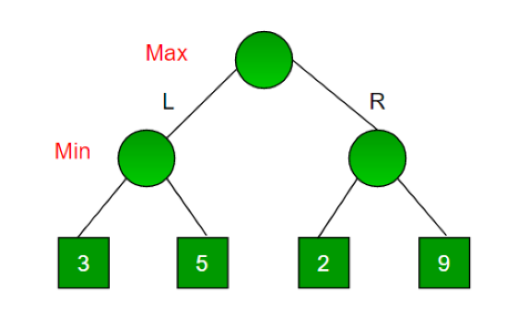

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/22.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Since this is a backtracking based algorithm, it tries all possible moves, then backtracks and makes a decision.

* Maximizer goes LEFT: It is now the minimizers turn. The minimizer now has a choice between 3 and 5. Being the minimizer it will definitely choose the least among both, that is 3
* Maximizer goes RIGHT: It is now the minimizers turn. The minimizer now has a choice between 2 and 9. He will choose 2 as it is the least among the two values.

Being the maximizer you would choose the larger value that is 3. Hence the optimal move for the maximizer is to go LEFT and the optimal value is 3.

#####**Implementation**

In [ ]:
import math

def minimax (curDepth, nodeIndex, maxTurn, scores, targetDepth):

	# base case : targetDepth reached
	if (curDepth == targetDepth):
		return scores[nodeIndex]

	if (maxTurn):
		return max(minimax(curDepth + 1, nodeIndex * 2, False, scores, targetDepth), minimax(curDepth + 1, nodeIndex * 2 + 1, False, scores, targetDepth))

	else:
		return min(minimax(curDepth + 1, nodeIndex * 2, True, scores, targetDepth), minimax(curDepth + 1, nodeIndex * 2 + 1, True, scores, targetDepth))

# Driver code
scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

The optimal value is : 12


####**Example 2**

Finding optimal move in Tic-Tac-Toe

#####**1. Define Player and Component**

In [ ]:
player, opponent = 'x', 'o'

#####**2. This function returns true if there are moves remaining on the board. It returns false if there are no moves left to play.**

In [ ]:
def isMovesLeft(board) :

	for i in range(3) :
		for j in range(3) :
			if (board[i][j] == '_') :
				return True
	return False

#####**3. Function that calculates the value of the board depending on the placement of pieces on the board.**

The basic idea behind the evaluation function is to give a high value for a board if the maximizer turn or a low value for the board if the minimizer turn.

In [ ]:
def evaluate(b) :

	# Checking for Rows for X or O victory.
	for row in range(3) :
		if (b[row][0] == b[row][1] and b[row][1] == b[row][2]) :
			if (b[row][0] == player) :
				return 10
			elif (b[row][0] == opponent) :
				return -10

	# Checking for Columns for X or O victory.
	for col in range(3) :

		if (b[0][col] == b[1][col] and b[1][col] == b[2][col]) :

			if (b[0][col] == player) :
				return 10
			elif (b[0][col] == opponent) :
				return -10

	# Checking for Diagonals for X or O victory.
	if (b[0][0] == b[1][1] and b[1][1] == b[2][2]) :

		if (b[0][0] == player) :
			return 10
		elif (b[0][0] == opponent) :
			return -10

	if (b[0][2] == b[1][1] and b[1][1] == b[2][0]) :

		if (b[0][2] == player) :
			return 10
		elif (b[0][2] == opponent) :
			return -10

	# Else if none of them have won then return 0
	return

#####**4. This is the minimax function. It considers all the possible ways the game can go and returns the value of the board**

In [ ]:
def minimax(board, depth, isMax) :
	score = evaluate(board)

	# If Maximizer has won the game return his/her evaluated score
	if (score == 10) :
		return score

	# If Minimizer has won the game return his/her evaluated score
	if (score == -10) :
		return score

	# If there are no more moves and no winner then it is a tie
	if (isMovesLeft(board) == False) :
		return 0

	# If this maximizer's move
	if (isMax) :
		best = -1000

		# Traverse all cells
		for i in range(3) :
			for j in range(3) :

				# Check if cell is empty
				if (board[i][j]=='_') :

					# Make the move
					board[i][j] = player

					# Call minimax recursively and choose the maximum value
					best = max( best, minimax(board, depth + 1, not isMax) )

					# Undo the move
					board[i][j] = '_'
		return best

	# If this minimizer's move
	else :
		best = 1000

		# Traverse all cells
		for i in range(3) :
			for j in range(3) :

				# Check if cell is empty
				if (board[i][j] == '_') :

					# Make the move
					board[i][j] = opponent

					# Call minimax recursively and choose
					# the minimum value
					best = min(best, minimax(board, depth + 1, not isMax))

					# Undo the move
					board[i][j] = '_'
		return best

#####**5. This will return the best possible move for the player**

In [ ]:
def findBestMove(board) :
	bestVal = -1000
	bestMove = (-1, -1)

	# Traverse all cells, evaluate minimax function for all empty cells. And return the cell with optimal value.
	for i in range(3) :
		for j in range(3) :

			# Check if cell is empty
			if (board[i][j] == '_') :

				# Make the move
				board[i][j] = player

				# compute evaluation function for this move.
				moveVal = minimax(board, 0, False)

				# Undo the move
				board[i][j] = '_'

				# If the value of the current move is  more than the best value, then update best
				if (moveVal > bestVal) :
					bestMove = (i, j)
					bestVal = moveVal

	print("The value of the best Move is :", bestVal)
	print()
	return bestMove

#####**6. Test Code**

In [ ]:
# Driver code
board = [
	[ 'x', 'o', 'x' ],
	[ 'o', 'o', 'x' ],
	[ '_', '_', '_' ]
]

bestMove = findBestMove(board)

print("The Optimal Move is :")
print("ROW:", bestMove[0], " COL:", bestMove[1])


The value of the best Move is : 10

The Optimal Move is :
ROW: 2  COL: 2


##**Search techniques**

###**Depth First Search (DFS)**

The Depth-First Search is a recursive algorithm that uses the concept of backtracking. It involves thorough searches of all the nodes by going ahead if potential, else by backtracking. Here, the word backtrack means once you are moving forward and there are not any more nodes along the present path, you progress backward on an equivalent path to seek out nodes to traverse. All the nodes are progressing to be visited on the current path until all the unvisited nodes are traversed after which subsequent paths are going to be selected.

**DFS Algorithm**

The recursive method of the Depth-First Search algorithm is implemented using stack. A standard Depth-First Search implementation puts every vertex of the graph into one in all 2 categories:

1. Visited

2. Not Visited.

The only purpose of this algorithm is to visit all the vertex of the graph avoiding cycles.

The DSF algorithm follows as:

* We will start by putting any one of the graph's vertex on top of the stack.
* After that take the top item of the stack and add it to the visited list of the vertex.
* Next, create a list of that adjacent node of the vertex. Add the ones which aren't in the visited list of vertexes to the top of the stack.
* Lastly, keep repeating steps 2 and 3 until the stack is empty.

####**DFS Example**

We will use an undirected graph with 5 vertices.

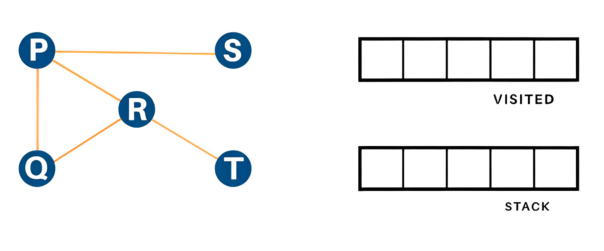

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/23.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

We begin from the vertex P, the DFS rule starts by putting it within the Visited list and putting all its adjacent vertices within the stack.

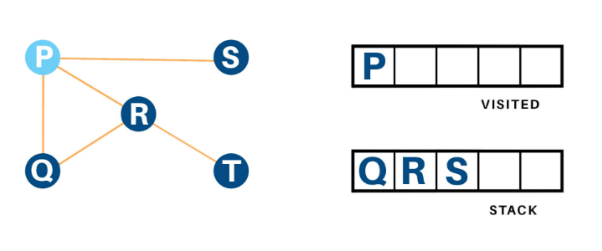

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/24.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

Next, we tend to visit the part at the highest of the stack i.e. Q, and head to its adjacent nodes. Since P has already been visited, we tend to visit R instead.

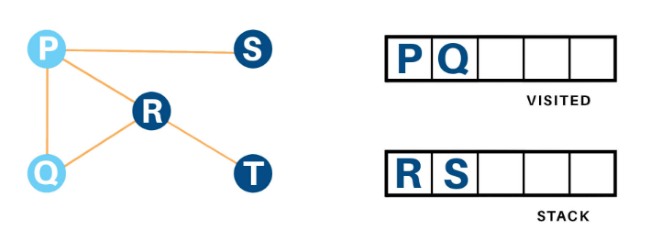

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/25.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

Vertex R has the unvisited adjacent vertex in T, therefore we will be adding that to the highest of the stack and visit it.

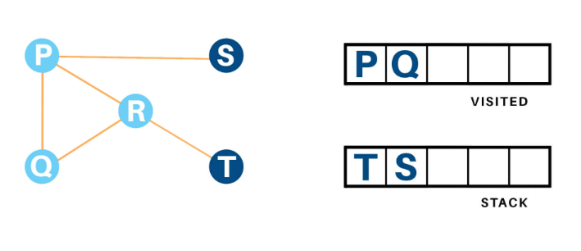

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/26.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

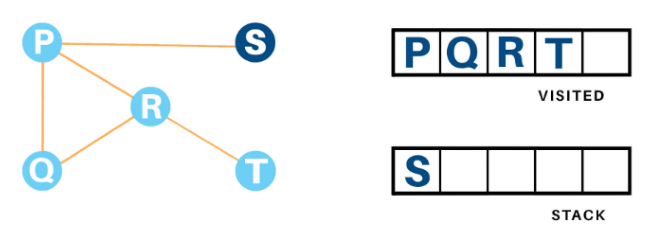

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/27.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

At last, we will visit the last component S, it does not have any unvisited adjacent nodes, thus we've completed the Depth First Traversal of the graph.

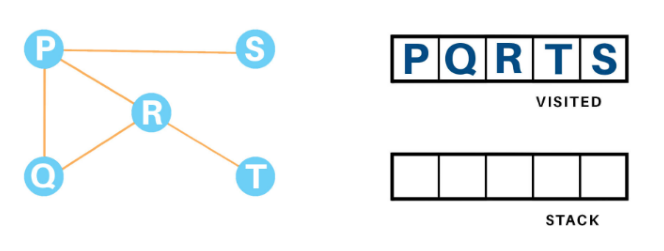

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/28.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

####**DFS Implementation**

In [ ]:
# Using a Python dictionary to act as an adjacency list
graph = {
  'P' : ['Q','R','S'],
  'R' : ['T'],
  'Q' : [],
  'T' : [],
  'S' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, 'P')

Following is the Depth-First Search
P
Q
R
T
S


###**Breadth First Search (BFS)**

Breadth-First Search (BFS) is an algorithm used for traversing graphs or trees. Traversing means visiting each node of the graph. Breadth-First Search is a recursive algorithm to search all the vertices of a graph or a tree.

**BFS Algorithm**

As breadth-first search is the process of traversing each node of the graph, a standard BFS algorithm traverses each vertex of the graph into two parts:
1. Visited
2. Not Visited.

So, the purpose of the algorithm is to visit all the vertex while avoiding cycles.

BFS starts from a node, then it checks all the nodes at distance one from the beginning node, then it checks all the nodes at distance two, and so on. So as to recollect the nodes to be visited, BFS uses a queue.

The steps of the algorithm work as follow:

 * Start by putting any one of the graph’s vertices at the back of the queue.
 * Now take the front item of the queue and add it to the visited list.
 * Create a list of that vertex's adjacent nodes. Add those which are not within the visited list to the rear of the queue.
 * Keep continuing steps two and three till the queue is empty.

####**BFS Example**

 Here, we will use an undirected graph with 5 vertices.

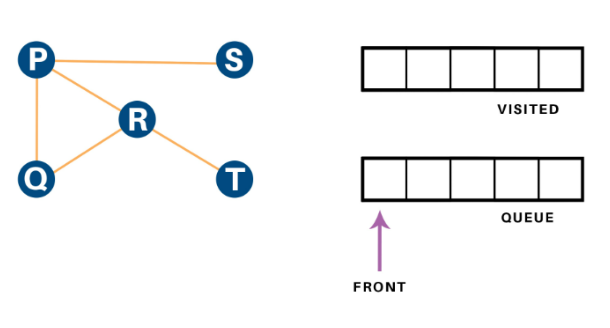

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/29.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

We begin from the vertex P, the BFS algorithmic program starts by putting it within the Visited list and puts all its adjacent vertices within the stack.

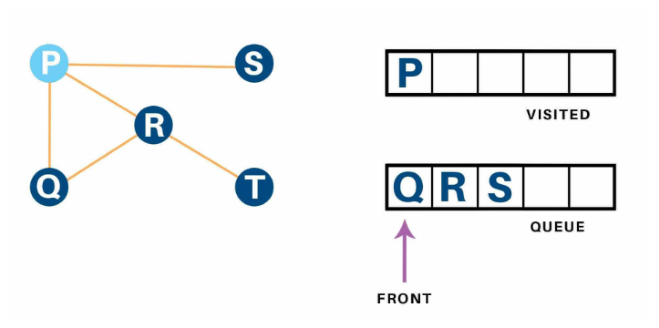

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/30.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Next, we have a tendency to visit the part at the front of the queue i.e. Q and visit its adjacent nodes. Since P has already been visited, we have a tendency to visit R instead.

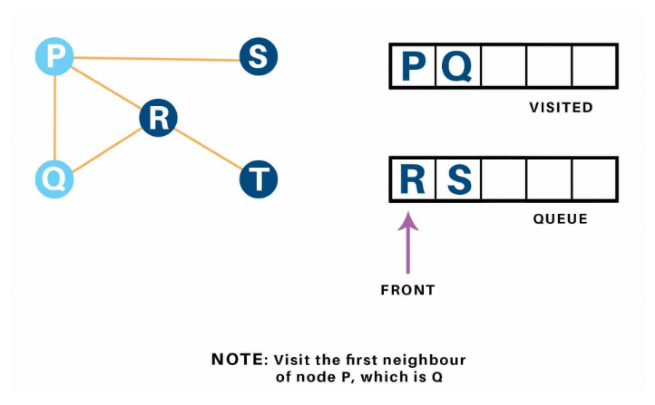

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/31.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

Vertex R has an unvisited adjacent vertex in T, thus we have a tendency to add that to the rear of the queue and visit S, which is at the front of the queue.

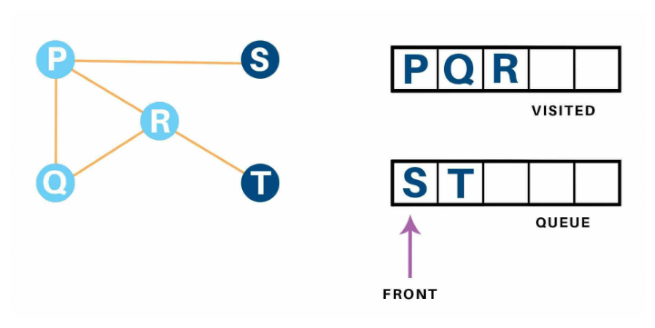

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/32.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

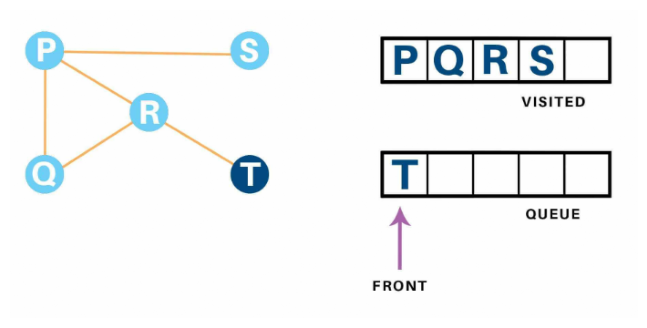

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/33.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Now, only T remains within the queue since the only adjacent node of S i.e. P is already visited. We have a tendency to visit it.

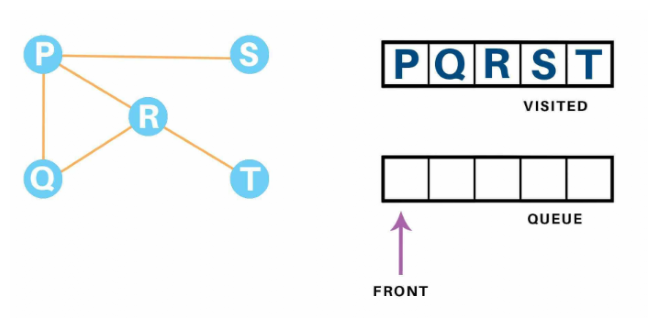

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/34.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Since the queue is empty, we've completed the Traversal of the graph.

####**BFS Implementation**

In [ ]:
graph = {
  'P' : ['Q','R','S'],
  'R' : ['T'],
  'Q' : [],
  'T' : [],
  'S' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0)
    print (m, end = " ")

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, 'P')    # function calling

Following is the Breadth-First Search
P Q R S T 

###**Uniform Cost Search (UCS)**


In contrast to BFS and DFS algorithms that don't take into consideration neither the cost between two nodes nor any heuristic value, the Greedy algorithm uses a heuristic value, such as the Manhattan distance, or the Euclidean distance to estimate the distance from the current node to the target node. On the other hand, the UCS algorithm uses the path's cost from the initial node to the current node as the extension criterion**. Starting from the initial state (starting node), the UCS algorithm, in each step chooses the node that is **closer **to the initial node. When the algorithm finds the solution, returns the path from the initial state to the final state. The UCS algorithm is characterized as complete, as it always returns a solution if exists. Moreover, the UCS algorithm guarantees the optimum solution.

**UCS Algorithm**

The UCS algorithm takes as inputs the graph along with the starting and the destination nodes and returns the optimum path between these nodes if exists. Similar to the Greedy algorithm, the UCS algorithm uses two lists, the *opened *and the *closed *list. The first list contains the nodes that are possible to be selected and the closed list contained the nodes that have already been selected. Firstly, the first node (initial state) is appended to the opened list (initialization phase). In each step, the node (selected node)with the smallest distance value is removed from the opened list and is appended to the closed list. For each child of the selected node, the algorithm calculates the distance from the first node to this. If the child does not exist in both lists or is in the opened list but with a bigger distance value from the initial node, then the child is appended in the opened list in the position of the corresponding node. The whole process is terminated when a solution is found, or the opened list be empty.

####**UCS Example**

We suppose that we have a graph representing a roadmap of a country, in which there are six cities (vertices — nodes) and a couple of edges connecting these cities. The graph has the following form:

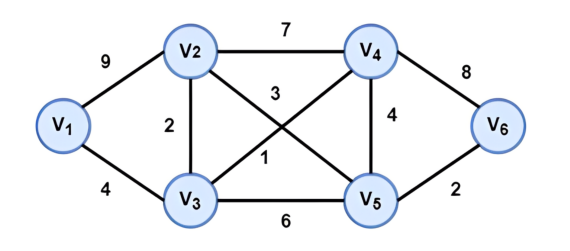

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/35.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

The first node V1 (initial state) of the graph is appended to the opened list. The distance of this node from itself is zero.

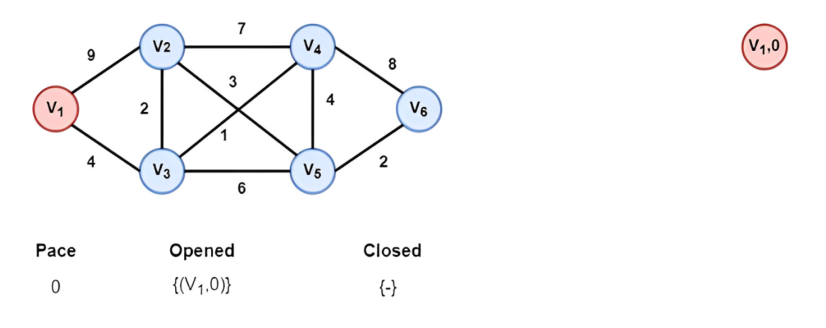

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/36.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

The V1 is selected as it is the only node in the opened list. Its children V2 and V3 are appended in the opened list after the distance calculation from node V1.

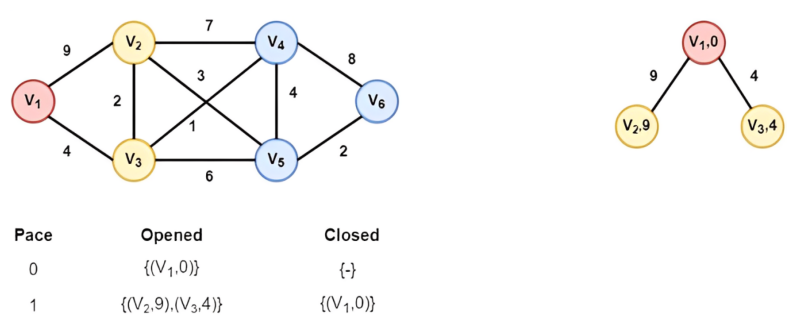

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/37.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Node V3 is selected as it has the smallest distance value. As we can see, extending the node V3 we find the node V2 with a smaller distance value. So we replace node (V2,9) with the new node (V2,6).

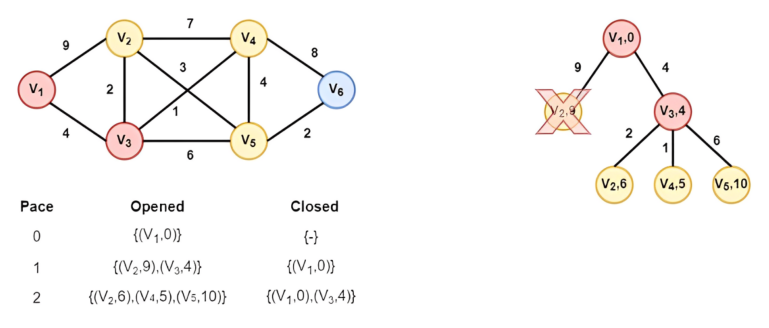

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/38.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

Node V4 is selected as it has the smallest distance value. In this step, we find a better distance value for node V5, so we replace the node (V5, 10) with node (V5, 9).

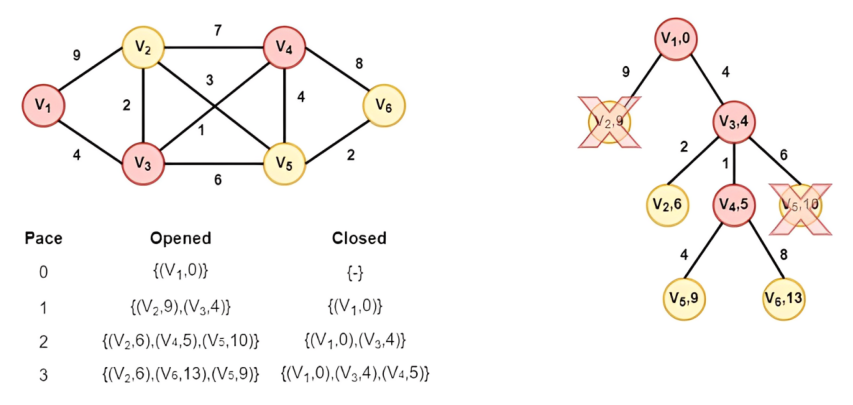

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/39.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

Node V2 is selected as it has the smallest distance value. However, none of its children is appended in the opened list, as nodes V3 and V4 are already inserted in the closed list and the algorithm doesn't find a better distance value for node V5.

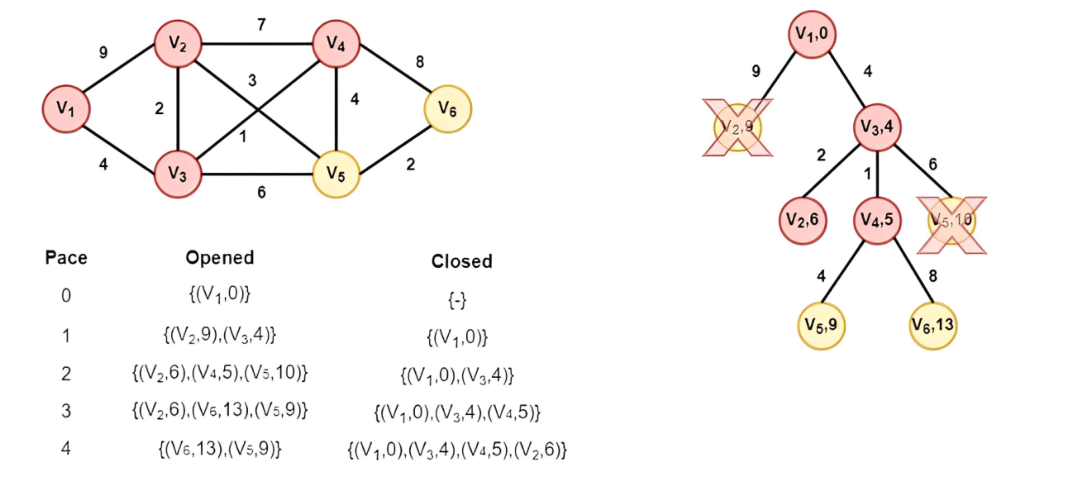

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/40.png')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

Node V2 is selected as it has the smallest distance value. A better path to node V6 is found in this step. So, we replace the old node (V6, 13) with node (V6, 11)

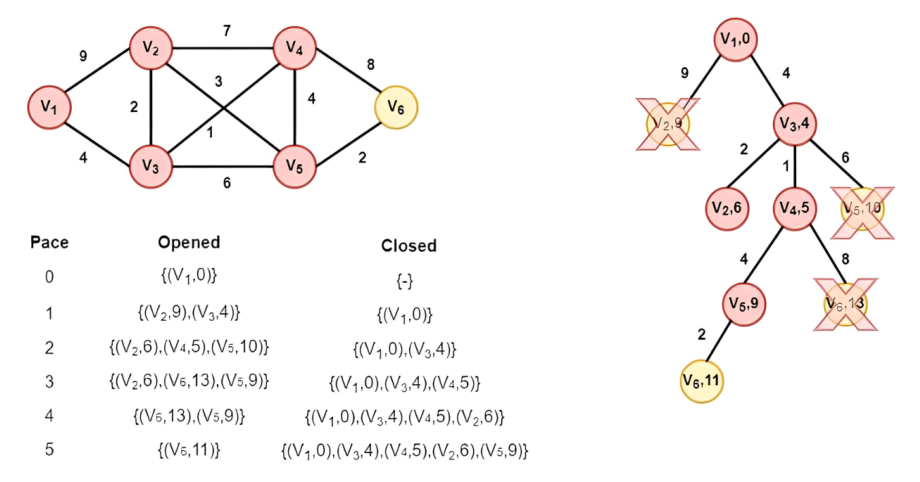

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/41.png')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

Node V6 (target node) is selected. So the algorithm returns the path from node V1 to node V6 with cost 11, which constitutes the best solution.

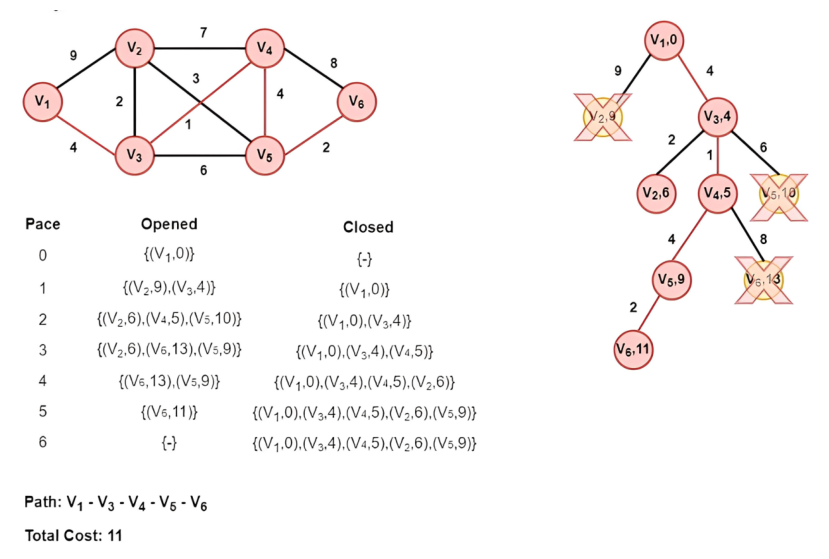

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/42.png')
plt.figure(figsize = (100,7))
plt.axis('off')
plt.imshow(image1);

####**UCS Implementation**

In [ ]:
# returns the minimum cost in a vector( if there are multiple goal states)
def uniform_cost_search(goal, start):

	# minimum cost uptogoal state from starting
	global graph,cost
	answer = []

	# create a priority queue
	queue = []

	# set the answer vector to max value
	for i in range(len(goal)):
		answer.append(10**8)

	# insert the starting index
	queue.append([0, start])

	# map to store visited node
	visited = {}

	# count
	count = 0

	# while the queue is not empty
	while (len(queue) > 0):

		# get the top element of the
		queue = sorted(queue)
		p = queue[-1]

		# pop the element
		del queue[-1]

		# get the original value
		p[0] *= -1

		# check if the element is part of the goal list
		if (p[1] in goal):

			# get the position
			index = goal.index(p[1])

			# if a new goal is reached
			if (answer[index] == 10**8):
				count += 1

			# if the cost is less
			if (answer[index] > p[0]):
				answer[index] = p[0]

			# pop the element
			del queue[-1]

			queue = sorted(queue)
			if (count == len(goal)):
				return answer

		# check for the non visited nodes which are adjacent to present node
		if (p[1] not in visited):
			for i in range(len(graph[p[1]])):

				# value is multiplied by -1 so that least priority is at the top
				queue.append( [(p[0] + cost[(p[1], graph[p[1]][i])])* -1, graph[p[1]][i]])

		# mark as visited
		visited[p[1]] = 1

	return answer

# main function
if __name__ == '__main__':

	# create the graph
	graph,cost = [[] for i in range(8)],{}

	# add edge
	graph[0].append(1)
	graph[0].append(2)
	graph[1].append(2)
	graph[1].append(3)
	graph[1].append(4)
	graph[2].append(3)
	graph[2].append(4)
	graph[3].append(4)
	graph[3].append(5)
	graph[4].append(5)

	# add the cost
	cost[(0, 1)] = 9
	cost[(0, 2)] = 4
	cost[(1, 2)] = 2
	cost[(1, 4)] = 3
	cost[(1, 3)] = 7
	cost[(2, 3)] = 1
	cost[(2, 4)] = 6
	cost[(3, 4)] = 4
	cost[(3, 5)] = 8
	cost[(4, 5)] = 2

	# goal state
	goal = []

	# set the goal
	# there can be multiple goal states
	goal.append(5)

	# get the answer
	answer = uniform_cost_search(goal, 0)

	# print the answer
	print("Minimum cost from 0 to 5 is = ",answer[0])


Minimum cost from 0 to 5 is =  11


##**Region-coloring problem**

We use Constraint Satisfaction framework to solve the region-coloring problem.

We have a few regions in the preceding figure that are labeled with names. Our goal is to color with four colors so that no adjacent regions have the same color.

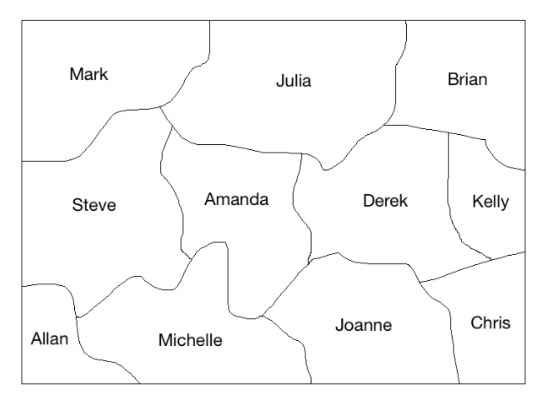

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/43.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

####**Import Necessary libraries**

In [ ]:
!pip install simpleai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=100985 sha256=8ae263d517efa2bd97916833facc7b6502c695346b7e9e1803d7f5fe7d057ff1
  Stored in directory: /root/.cache/pip/wheels/91/0c/38/421d7910e7bc59b97fc54f490808bdb1097607d83d1a592865
Successfully built simpleai


In [ ]:
from simpleai.search import CspProblem, backtrack

####**2. Define the constraint that specifies that the values should be different:**

In [ ]:
def constraint_func(names, values):
    return values[0] != values[1]

####**3. Define the main function and specify the list of names**

In [ ]:
if __name__=='__main__':
    names = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian', 'Chris',
            'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly')

####**4. Define the list of possible colors**

In [ ]:
colors = dict((name, ['red', 'green', 'blue', 'gray']) for name in names)

####**5. Define the constraints**

In [ ]:
 constraints = [
      (('Mark', 'Julia'), constraint_func),
      (('Mark', 'Steve'), constraint_func),
      (('Julia', 'Steve'), constraint_func),
      (('Julia', 'Amanda'), constraint_func),
      (('Julia', 'Derek'), constraint_func),
      (('Julia', 'Brian'), constraint_func),
      (('Steve', 'Amanda'), constraint_func),
      (('Steve', 'Allan'), constraint_func),
      (('Steve', 'Michelle'), constraint_func),
      (('Amanda', 'Michelle'), constraint_func),
      (('Amanda', 'Joanne'), constraint_func),
      (('Amanda', 'Derek'), constraint_func),
      (('Brian', 'Derek'), constraint_func),
      (('Brian', 'Kelly'), constraint_func),
      (('Joanne', 'Michelle'), constraint_func),
      (('Joanne', 'Amanda'), constraint_func),
      (('Joanne', 'Derek'), constraint_func),
      (('Joanne', 'Kelly'), constraint_func),
      (('Derek', 'Kelly'), constraint_func),
      (('Chris', 'Kelly'), constraint_func),
      (('Chris', 'Derek'), constraint_func),
      (('Chris', 'Joanne'), constraint_func)
    ]

####**6. Solve the problem and print the solution**

In [ ]:
problem = CspProblem(names, colors, constraints)

In [ ]:
output = backtrack(problem)
print('\nColor mapping:\n')
for k, v in output.items():
    print(k, '==>', v)


Color mapping:

Mark ==> red
Julia ==> green
Steve ==> blue
Amanda ==> red
Brian ==> red
Joanne ==> green
Derek ==> blue
Allan ==> red
Michelle ==> gray
Kelly ==> gray


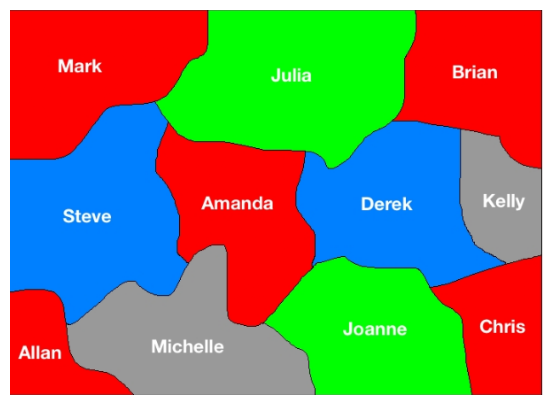

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project/Project_3/images/44.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);